### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import time
import random
import copy
import os
import sys
import circuits

from scipy import interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

from collections import defaultdict
from math import log2

print (pd.__version__)
RUN_CONFIGURATION_LOOP = False

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


1.0.3


### Graph functions

In [2]:
def graph_with_errs_d3(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["Z3"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
        
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
        

def graph_with_errs_d5(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
             x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["Z6"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X10"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z11"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["X19"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z20"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X21"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
            
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df


def graph_with_errs_d7(df):
    x_data = []
    z_data = []

    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, -0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 0.5, 5.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 0.5, 6.5))
        if df.loc[i].at["Z10"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X11"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 1.5, 4.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 1.5, 5.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z19"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X20"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z21"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 2.5, 5.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 2.5, 6.5))
        if df.loc[i].at["Z24"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X25"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["Z26"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X27"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["Z28"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        if df.loc[i].at["X29"] == -1:
            x_data[i].append((0, 3.5, 4.5))
        if df.loc[i].at["Z30"] == -1:
            z_data[i].append((0, 3.5, 5.5))
        if df.loc[i].at["Z31"] == -1:
            z_data[i].append((0, 4.5, 0.5))
        if df.loc[i].at["X32"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z33"] == -1:
            z_data[i].append((0, 4.5, 2.5))
        if df.loc[i].at["X34"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z35"] == -1:
            z_data[i].append((0, 4.5, 4.5))
        if df.loc[i].at["X36"] == -1:
            x_data[i].append((0, 4.5, 5.5))
        if df.loc[i].at["Z37"] == -1:
            z_data[i].append((0, 4.5, 6.5))
        if df.loc[i].at["Z38"] == -1:
            z_data[i].append((0, 5.5, -0.5))
        if df.loc[i].at["X39"] == -1:
            x_data[i].append((0, 5.5, 0.5))
        if df.loc[i].at["X40"] == -1:
            x_data[i].append((0, 6.5, 1.5))
        if df.loc[i].at["Z41"] == -1:
            z_data[i].append((0, 5.5, 1.5))
        if df.loc[i].at["X42"] == -1:
            x_data[i].append((0, 5.5, 2.5))
        if df.loc[i].at["X43"] == -1:
            x_data[i].append((0, 6.5, 3.5))
        if df.loc[i].at["Z44"] == -1:
            z_data[i].append((0, 5.5, 3.5))
        if df.loc[i].at["X45"] == -1:
            x_data[i].append((0, 5.5, 4.5))
        if df.loc[i].at["X46"] == -1:
            x_data[i].append((0, 6.5, 5.5))
        if df.loc[i].at["Z47"] == -1: 
            z_data[i].append((0, 5.5, 5.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
        
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df

### MWPM functions

In [3]:
def add_measurement_errs(curr_syn, prob_err, x_syn, depth):
    #x_syn is True if it is x syndrome, False if it is Z syndrome
    total_time = 0
    new_syn = []
    if x_syn:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_xmeasurement_errs(depth, prob_err))
    else:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_zmeasurement_errs(depth, prob_err))


def do_new_decoding(data, depth, prob_err):
    decoder = circuits.GraphDecoder(depth,1)
    G = decoder.S['Z']
    df = pd.DataFrame()
    syn = []
    total_time = 0
    
    for row in data:
        x_input = []
        z_input = []
        x_type = True
        for col in row:
            if not col == "[]":
                col = eval(col)
                for c in col:
                    if x_type:
                        x_input.append(c)
                    else:
                        z_input.append(c)
            x_type = not x_type  
            
        if prob_err > 0:
            syndromes_x = add_measurement_errs(x_input, prob_err, True, depth)
            syndromes_z = add_measurement_errs(z_input, prob_err, False, depth)
        else:
            syndromes_x = x_input
            syndromes_z = z_input

        start = time.time_ns()
        error_graph_x, paths_x = decoder.make_error_graph(syndromes_x,'X')
        matching_graph_x = decoder.matching_graph(error_graph_x,'X')
        matches_x = decoder.matching(matching_graph_x,'X')
        flips_x = decoder.calculate_qubit_flips(matches_x, paths_x,'X')
        syn_x = (translate_errors(flips_x))

        error_graph_z, paths_z = decoder.make_error_graph(syndromes_z,'Z')
        matching_graph_z = decoder.matching_graph(error_graph_z,'Z')
        matches_z = decoder.matching(matching_graph_z,'Z')
        flips_z = decoder.calculate_qubit_flips(matches_z, paths_z,'Z')
        syn_z = translate_errors(flips_z)
        df = df.append(pd.Series([syn_x, syn_z]), ignore_index=True)
        end = time.time_ns()
        total_time += (end - start)/ (10 ** 9)
    return (df, total_time) 


def return_xmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, 1.5, 0.5), (0, 2.5, 1.5)]
    elif depth == 5:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, 1.5, 0.5), (0, 1.5, 2.5),
                        (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 3.5, 0.5), (0, 4.5, 1.5), (0, 3.5, 2.5), (0, 4.5, 3.5)]
    else:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, -0.5, 4.5), (0, 0.5, 5.5),
                        (0, 1.5, 0.5), (0, 1.5, 2.5), (0, 1.5, 4.5), (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 2.5, 5.5),
                        (0, 3.5, 0.5),  (0, 3.5, 2.5), (0, 3.5, 4.5), (0, 4.5, 1.5), (0, 4.5, 3.5), (0, 4.5, 5.5),
                       (0, 5.5, 0.5), (0, 6.5, 1.5), (0, 5.5, 2.5), (0, 6.5, 3.5), (0, 5.5, 4.5), (0, 6.5, 5.5)]
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs
            

def return_zmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
    elif depth == 5:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 1.5, -0.5), (0, 1.5, 1.5), (0, 1.5, 3.5),
                        (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 3.5, -0.5), (0, 3.5, 1.5), (0, 3.5, 3.5)]
    else:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 0.5, 6.5), (0, 1.5, -0.5), (0, 1.5, 1.5),
                        (0, 1.5, 3.5), (0, 1.5, 5.5), (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 2.5, 6.5),
                        (0, 3.5, -0.5),  (0, 3.5, 1.5), (0, 3.5, 3.5), (0, 3.5, 5.5), (0, 4.5, 0.5), (0, 4.5, 2.5),
                       (0, 4.5, 4.5), (0, 4.5, 6.5), (0, 5.5, -0.5), (0, 5.5, 1.5), (0, 5.5, 3.5), (0, 5.5, 5.5)]
        
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs


def translate_errors (phys_errs):
    flipX = np.array([(0, 1),(1, 0)])
    flipZ = np.array([(1, 0), (0, -1)])
    errs = []
    str2 = ""
    for qubit, flip in phys_errs.items():
        row = int(qubit[1])
        col = int(qubit[2])
        if str(flip) == "X":
            str1 = "X"
        elif str(flip) == "Z":
            str1 = "Z"
        else:
            str1 = "X"
            str2 = "Z"
        str1 += str(row) + str(col)
        errs.append(str1)
        if str2 != "":
            str2 += str(row) +str(col)
            errs.append(str2)
            str2 = ""
    return errs   


def translate_to_graph(df_graph, labels, mlb):
#go through labels given
    indices = []
    labels = mlb.inverse_transform(labels)
    
    for row in labels:
        label_str = str(row)
        for index, r in df_graph.iterrows():
            if label_str == "('',)":
                if str(r["Labels"]) == "[' ']":
                    indices.append([index])
                    break
            if set(row) == set(r["Labels"]):
                indices.append([index])
                break

    df_syns = df_graph.drop(['Labels'], axis=1)
    return_df = pd.DataFrame()
    for i in indices:
        return_df = return_df.append(df_syns.loc[i])
    return return_df

### Preprocessing functions

In [4]:
def create_list_from_string(err_list):
    newstring = err_list.replace("'", "")
    new_err_list = newstring.strip('][').split(', ')
    return sorted(set(new_err_list))


def create_string_from_list(err_list):
    return_string = "["
    if err_list[0] == "''":
        return "[' ']"
    else:
        for index, i in enumerate(err_list):
            return_string = return_string +  "'" + i + "'"
            if index < (len(err_list)-1):
                return_string += ", "
    return return_string + "]"
        

#take in two 2d arrays of predicted values, true values, and threshold to determine labels. 
#calculates the partial accuracy of the predicted values, averaged out for all obersvations
def partial_accuracy(y_pred, y_true):
    total = 0
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    for i in range(0, rows):
        row_correct = 0
        for j in range(0, cols):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
        total += row_correct/cols
    return total/rows


def partial_accuracy_and_contingency(y_pred, y_true, mlb):
    total = 0
    a= np.zeros(shape=y_true.shape)
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    df = pd.DataFrame(a, columns = mlb.classes_)
    for i in range(0, rows):
        row_correct = 0
        for j, label in enumerate(mlb.classes_):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
                df.at[i, label] = 1
            else:
                df.at[i, label] = 0

        total += row_correct/cols

    return (total/rows, df)


def contingency_table_and_t (clf1, clf2):
    a = 0 #clf1 pos, clf2 pos
    b = 0 #clf1 pos, clf2 neg
    c = 0 #clf1 neg, clf2 pos
    d = 0 #clf1 neg, clf2 neg
    
    for index, value in clf1.items():
        if value == 1 and clf2[index] == 1:
            a+=1
        elif value == 1 and clf2[index] == 0: #classifier 1 right, classifier 2 wrong
            b+=1
        elif value == 0 and clf2[index] == 1: #classifier 1 wrong, classifier 2 right
            c+=1
        else:
            d+=1
    print("["+str(a)+", "+str(b)+"]")
    print("["+str(c)+", "+str(d)+"]")
    if b == 0 and c ==0:
        print("both b and c are zero")
        t=0
    else:
        t = (((b-c)-1)**2)/(b+c)
    return ([[a,b],[c,d]], t)


def add_noise(val, noise_level):
    rand = random.uniform(0, 1)
    if rand <= noise_level:
        if val == -1:
            val = 1
        elif val == 1:
            val = -1
    return val

### Lookup table functions

In [5]:
def generateAllBinaryStrings(n, arr, i, lookup):  
    if i == n: 
        lookup.setBitStringArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1, lookup)  
  
    # And then assign "1" at ith position  , 
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1, lookup)


class lookup_decoder:
    
    def __init__(self, depth):
        #self.lookupTable = defaultdict()
        self.lookupTable = {}
        self.distributions = {}
        self.depth = depth
        #generating all possible syndrome observations
        #arr = [None] * (depth**2 - 1)
        #generateAllBinaryStrings((depth**2 - 1), arr, 0, self)
        
    def setBitStringArray(self, arr, n): 
        new_str = ""
        for i in range(0, n):  
            new_str += str(arr[i])
        self.lookupTable.update({new_str:defaultdict()})  
        
    def update_table (self, syndrome, phys_errs):
        #all the keys are made in the init, so simply update the physical error combinations for the given syndrome
        if syndrome not in self.lookupTable:
            self.lookupTable[syndrome] = {}
            self.lookupTable[syndrome][phys_errs] = 1
            return
        
        if phys_errs not in self.lookupTable[syndrome]:
            self.lookupTable[syndrome].update({phys_errs: 1})
        else:
            self.lookupTable[syndrome][phys_errs] += 1
     
    def get_probable_error(self, syndrome):
        return_key = []

        if syndrome not in self.lookupTable.keys():
            for i in range(2* int(self.depth**2) + 1):
                return_key.append(0)
            return return_key
        
        key, value = max(self.lookupTable[syndrome].items(), key=lambda x:x[1])
        
        for character in key:
            if character == '0' or character == '1':
                return_key.append(int(character))
                
        return return_key
        
    def make_distribution_graph(self, syn):
        
        plt.bar(list(self.lookupTable[syn].keys()), self.lookupTable[syn].values(), color='g')
        plt.show()
        
    def syndrome_count_graph(self):
        graph_dict = {}
        for syn in self.lookupTable:
            graph_dict.update({syn:sum(self.lookupTable[syn].values())})
        plt.ylim((0,4))
        plt.bar(graph_dict.keys(), graph_dict.values())
        plt.show()
    
    def length_of_lookup(self):
        print(len(self.lookupTable))
            
    def get_entropies(self):
        entropies = {}
        for syn in self.lookupTable:
            total = sum(self.lookupTable[syn].values())
            h = 0
            for key in self.lookupTable[syn]:
                p = self.lookupTable[syn][key]/total
                h += p+log2(p)
            entropies[syn] = -h
        print(entropies)
            
    def get_syndromes(self):
        return self.lookupTable.keys()
                     
    def print_lookup(self):
        for syn in self.lookupTable:
            print(self.lookupTable[syn])
            

def train_plut(table, data_x, data_y):
    i = 0
    for index, x in enumerate(data_x):
        syn = "".join([str(i) for i in x])
        syn = syn.replace(".0","")
        labels = np.array2string(np.array(data_y[i]), precision=1, separator='',suppress_small=True).replace("[","").replace("]","")
        table.update_table(syn, labels)
        i+=1
    return table


def test_plut(table, test_set):
    predictions_lookup = []
    for index, x in enumerate(test_set):
        syn_x = "".join([str(i) for i in x])
        syn_x = syn_x.replace(".0","")
        predictions_lookup.append(table.get_probable_error(syn_x))
    return np.array(predictions_lookup)

### Model compilation functions

In [6]:
def compile_FFNN_model_DepthThree(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(8, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(18 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthThree(depth):
    model = Sequential()
    layers = 4

    model.add(Dense(8, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(19 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthFive(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(24, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(240, activation='relu'))
    
    model.add(Dense(51, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthSeven(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(48, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(400, activation='relu'))
    
    model.add(Dense(99, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model

# D3 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D3:
* Original:
    - "depth3_all_combos.csv"
* Exhaustive:
    - "ex-samples-d3.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d3-1000.csv"
    - "v2samples-d3-10000.csv"
    - "v2samples-d3-100000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d3-1000.csv"
    - "v3samples-d3-10000.csv"

In [7]:
start_time = time.time()
trainData_d3 = pd.read_csv("SAMPLES/v2samples-d3-1000.csv")

trainData_d3["Labels"] = trainData_d3['Labels'].map(lambda x: create_list_from_string(x))
trainData_d3 = trainData_d3.applymap(lambda x: add_noise(x,.01))

testData_d3_MWPM = graph_with_errs_d3(trainData_d3)

mlb_d3 = MultiLabelBinarizer()
mlb_d3.fit(trainData_d3["Labels"])
df = pd.DataFrame(mlb_d3.transform(trainData_d3['Labels']))
df['Labels']= df.values.tolist()
trainData_d3 = trainData_d3.drop(['Labels'], axis=1)
trainData_d3 = pd.concat([df['Labels'], testData_d3_MWPM, trainData_d3], axis=1, ignore_index=True)
trainData_d3.columns = ["Labels","XSyn", "ZSyn", "X0", "Z1", "X2", "Z3", "Z4", "X5", "X6", "Z7"]

y_d3 = trainData_d3["Labels"]
x_d3 = trainData_d3.drop(["Labels"], axis=1)

x_d3 = x_d3.replace([-1], 0)
print("Data imported and formatted in %s seconds" % (time.time() - start_time))

Data imported and formatted in 3.488793134689331 seconds


### Fit model on training data

In [37]:
start_time = time.time()
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d3 = inputs[:,2:]
train_output_d3 = targets[:,1:]

x_train_d3, x_test_d3, Y_train_d3, Y_test_d3 = train_test_split(train_input_d3, train_output_d3, train_size=0.75, shuffle=True)

model = compile_FFNN_model_DepthThree(3)
print("Fit model on training data")
history = model.fit(
    x=x_train_d3,
    y=Y_train_d3,
    validation_split=.25,
    epochs=200
)
model.summary()
print("Model trained in %s seconds" % (time.time() - start_time))

Fit model on training data
Train on 5625 samples, validate on 1875 samples
Epoch 1/200
5625/5625 [==============================] - 0s 59us/step - loss: 0.6442 - accuracy: 0.7006 - val_loss: 0.5934 - val_accuracy: 0.7446
Epoch 2/200
5625/5625 [==============================] - 0s 36us/step - loss: 0.5770 - accuracy: 0.7443 - val_loss: 0.5717 - val_accuracy: 0.7447
Epoch 3/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5706 - accuracy: 0.7443 - val_loss: 0.5702 - val_accuracy: 0.7447
Epoch 4/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5694 - accuracy: 0.7443 - val_loss: 0.5692 - val_accuracy: 0.7447
Epoch 5/200
5625/5625 [==============================] - 0s 36us/step - loss: 0.5684 - accuracy: 0.7443 - val_loss: 0.5682 - val_accuracy: 0.7447
Epoch 6/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5674 - accuracy: 0.7443 - val_loss: 0.5672 - val_accuracy: 0.7447
Epoch 7/200
5625/5625 [==========================

Epoch 112/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5213 - accuracy: 0.7449 - val_loss: 0.5213 - val_accuracy: 0.7448
Epoch 113/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5213 - accuracy: 0.7451 - val_loss: 0.5212 - val_accuracy: 0.7444
Epoch 114/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5211 - accuracy: 0.7451 - val_loss: 0.5213 - val_accuracy: 0.7450
Epoch 115/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5211 - accuracy: 0.7449 - val_loss: 0.5210 - val_accuracy: 0.7443
Epoch 116/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5210 - accuracy: 0.7449 - val_loss: 0.5218 - val_accuracy: 0.7437
Epoch 117/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.5209 - accuracy: 0.7449 - val_loss: 0.5213 - val_accuracy: 0.7445
Epoch 118/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5209 - accuracy: 0.7451 - val_

### Generate confusion matrix and F1 scores on test sets

In [38]:
predictions_d3 = model.predict(x_test_d3)

y_pred = predictions_d3
y_test = Y_test_d3

y_pred[y_pred>=.5]=1 
y_pred[y_pred<.5]=0

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)-1):
    for j in range(len(y_test[0])-1):
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 1:
            TP += 1
        if y_pred[i][j] == 1 and y_test[i][j] != y_pred[i][j]:
            FP += 1
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 0:
            TN += 1
        if y_pred[i][j] == 0 and y_test[i][j] != y_pred[i][j]:
            FN += 1
            
print("True positive:   " + str(TP) + "\nFalse positive:  " + str(FP) + "\nTrue negative:   " + str(TN) + "\nFalse negative:  " + str(FN))

True positive:   1507
False positive:  1549
True negative:   30194
False negative:  9250


### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

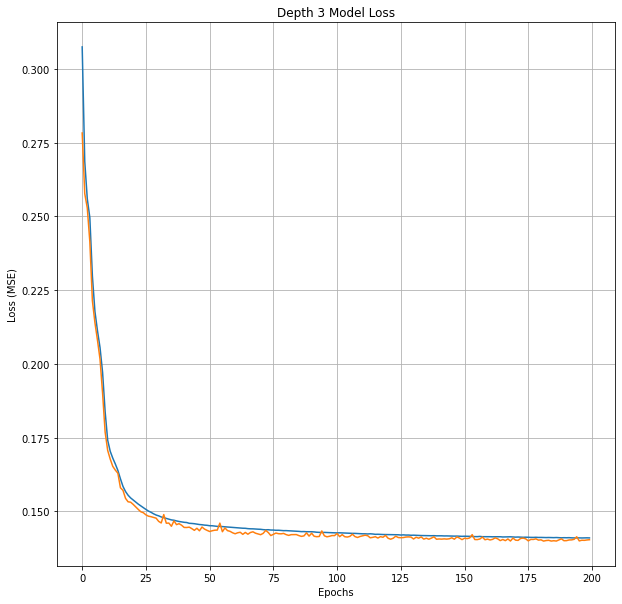

In [27]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 3 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

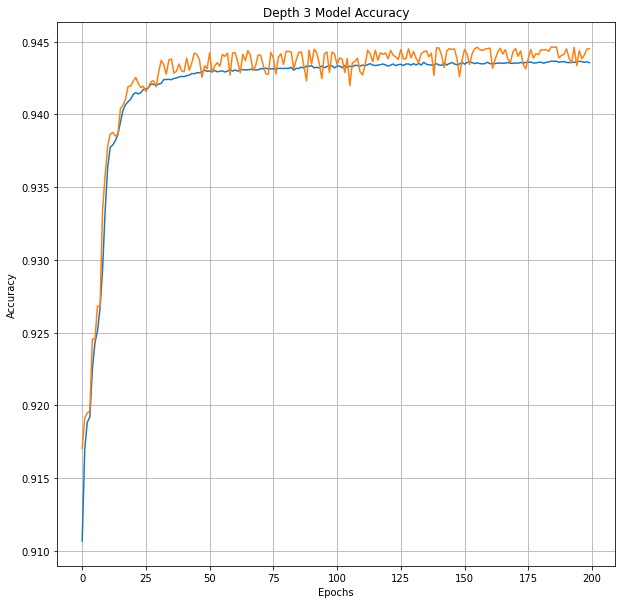

In [28]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 3 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [39]:
model.save("model_d3_v3-10k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 640 samples, validate on 160 samples
Epoch 1/200
640/640 [==============================] - 0s 409us/step - loss: 0.6928 - accuracy: 0.5697 - val_loss: 0.6850 - val_accuracy: 0.6243
Epoch 2/200
640/640 [==============================] - 0s 34us/step - loss: 0.6790 - accuracy: 0.6809 - val_loss: 0.6726 - val_accuracy: 0.7329
Epoch 3/200
640/640 [==============================] - 0s 36us/step - loss: 0.6672 - accuracy: 0.7730 - val_loss: 0.6614 - val_accuracy: 0.8220
Epoch 4/200
640/640 [==============================] - 0s 34us/step - loss: 0.6558 - accuracy: 0.8493 - val_loss: 0.6500 - val_accuracy: 0.8789
Epoch 5/200
640/640 [==============================] - 0s 36us/step - loss: 0.6433 - accuracy: 0.8947 - val_loss: 0.6360 - val_accuracy: 0.9118
Epoch 6/200
640/640 [==============================] - 0s 34us/step - loss: 0.6271 - accuracy: 0.9155 - val_loss: 0.6184 - val_accuracy:

640/640 [==============================] - 0s 33us/step - loss: 0.2616 - accuracy: 0.9219 - val_loss: 0.2607 - val_accuracy: 0.9227
Epoch 113/200
640/640 [==============================] - 0s 36us/step - loss: 0.2614 - accuracy: 0.9219 - val_loss: 0.2605 - val_accuracy: 0.9227
Epoch 114/200
640/640 [==============================] - 0s 34us/step - loss: 0.2613 - accuracy: 0.9219 - val_loss: 0.2604 - val_accuracy: 0.9227
Epoch 115/200
640/640 [==============================] - 0s 34us/step - loss: 0.2611 - accuracy: 0.9219 - val_loss: 0.2603 - val_accuracy: 0.9227
Epoch 116/200
640/640 [==============================] - 0s 34us/step - loss: 0.2610 - accuracy: 0.9219 - val_loss: 0.2601 - val_accuracy: 0.9227
Epoch 117/200
640/640 [==============================] - 0s 36us/step - loss: 0.2608 - accuracy: 0.9219 - val_loss: 0.2600 - val_accuracy: 0.9227
Epoch 118/200
640/640 [==============================] - 0s 34us/step - loss: 0.2606 - accuracy: 0.9219 - val_loss: 0.2599 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 2 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 216us/step - loss: 0.6857 - accuracy: 0.7127 - val_loss: 0.6781 - val_accuracy: 0.8408
Epoch 2/200
640/640 [==============================] - 0s 38us/step - loss: 0.6700 - accuracy: 0.8676 - val_loss: 0.6608 - val_accuracy: 0.8761
Epoch 3/200
640/640 [==============================] - 0s 36us/step - loss: 0.6520 - accuracy: 0.8703 - val_loss: 0.6426 - val_accuracy: 0.8715
Epoch 4/200
640/640 [==============================] - 0s 36us/step - loss: 0.6334 - accuracy: 0.8752 - val_loss: 0.6235 - val_accuracy: 0.8794
Epoch 5/200
640/640 [==============================] - 0s 39us/step - loss: 0.6134 - accuracy: 0.8802 - val_loss: 0.6022 - val_accuracy: 0.8800
Epoch 6/200
640/640 [==============================] - 0s 36us/step - loss: 0.5904 - accuracy: 0.8829 - val_loss: 0.5771 - val_accuracy:

640/640 [==============================] - 0s 38us/step - loss: 0.2640 - accuracy: 0.9221 - val_loss: 0.2623 - val_accuracy: 0.9232
Epoch 113/200
640/640 [==============================] - 0s 34us/step - loss: 0.2640 - accuracy: 0.9221 - val_loss: 0.2623 - val_accuracy: 0.9232
Epoch 114/200
640/640 [==============================] - 0s 36us/step - loss: 0.2639 - accuracy: 0.9221 - val_loss: 0.2622 - val_accuracy: 0.9232
Epoch 115/200
640/640 [==============================] - 0s 36us/step - loss: 0.2639 - accuracy: 0.9221 - val_loss: 0.2622 - val_accuracy: 0.9232
Epoch 116/200
640/640 [==============================] - 0s 36us/step - loss: 0.2638 - accuracy: 0.9221 - val_loss: 0.2622 - val_accuracy: 0.9232
Epoch 117/200
640/640 [==============================] - 0s 34us/step - loss: 0.2638 - accuracy: 0.9221 - val_loss: 0.2621 - val_accuracy: 0.9232
Epoch 118/200
640/640 [==============================] - 0s 33us/step - loss: 0.2637 - accuracy: 0.9221 - val_loss: 0.2621 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 3 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 206us/step - loss: 0.6807 - accuracy: 0.6577 - val_loss: 0.6679 - val_accuracy: 0.7666
Epoch 2/200
640/640 [==============================] - 0s 36us/step - loss: 0.6554 - accuracy: 0.8098 - val_loss: 0.6408 - val_accuracy: 0.8728
Epoch 3/200
640/640 [==============================] - 0s 38us/step - loss: 0.6244 - accuracy: 0.8791 - val_loss: 0.6053 - val_accuracy: 0.8875
Epoch 4/200
640/640 [==============================] - 0s 34us/step - loss: 0.5816 - accuracy: 0.9072 - val_loss: 0.5530 - val_accuracy: 0.9219
Epoch 5/200
640/640 [==============================] - 0s 34us/step - loss: 0.5149 - accuracy: 0.9215 - val_loss: 0.4679 - val_accuracy: 0.9219
Epoch 6/200
640/640 [==============================] - 0s 36us/step - loss: 0.4137 - accuracy: 0.9218 - val_loss: 0.3564 - val_accuracy:

640/640 [==============================] - 0s 41us/step - loss: 0.2551 - accuracy: 0.9218 - val_loss: 0.2553 - val_accuracy: 0.9222
Epoch 113/200
640/640 [==============================] - 0s 39us/step - loss: 0.2547 - accuracy: 0.9218 - val_loss: 0.2551 - val_accuracy: 0.9222
Epoch 114/200
640/640 [==============================] - 0s 39us/step - loss: 0.2544 - accuracy: 0.9218 - val_loss: 0.2547 - val_accuracy: 0.9222
Epoch 115/200
640/640 [==============================] - 0s 38us/step - loss: 0.2540 - accuracy: 0.9218 - val_loss: 0.2544 - val_accuracy: 0.9222
Epoch 116/200
640/640 [==============================] - 0s 36us/step - loss: 0.2536 - accuracy: 0.9218 - val_loss: 0.2540 - val_accuracy: 0.9222
Epoch 117/200
640/640 [==============================] - 0s 34us/step - loss: 0.2532 - accuracy: 0.9218 - val_loss: 0.2537 - val_accuracy: 0.9222
Epoch 118/200
640/640 [==============================] - 0s 39us/step - loss: 0.2527 - accuracy: 0.9218 - val_loss: 0.2533 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 4 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 222us/step - loss: 0.6855 - accuracy: 0.5802 - val_loss: 0.6703 - val_accuracy: 0.6832
Epoch 2/200
640/640 [==============================] - 0s 36us/step - loss: 0.6543 - accuracy: 0.7245 - val_loss: 0.6398 - val_accuracy: 0.7532
Epoch 3/200
640/640 [==============================] - 0s 36us/step - loss: 0.6212 - accuracy: 0.7718 - val_loss: 0.6023 - val_accuracy: 0.7800
Epoch 4/200
640/640 [==============================] - 0s 36us/step - loss: 0.5748 - accuracy: 0.7919 - val_loss: 0.5444 - val_accuracy: 0.8202
Epoch 5/200
640/640 [==============================] - 0s 36us/step - loss: 0.5000 - accuracy: 0.8544 - val_loss: 0.4510 - val_accuracy: 0.8771
Epoch 6/200
640/640 [==============================] - 0s 42us/step - loss: 0.3962 - accuracy: 0.9038 - val_loss: 0.3474 - val_accuracy:

640/640 [==============================] - 0s 36us/step - loss: 0.2462 - accuracy: 0.9227 - val_loss: 0.2490 - val_accuracy: 0.9229
Epoch 113/200
640/640 [==============================] - 0s 36us/step - loss: 0.2458 - accuracy: 0.9227 - val_loss: 0.2485 - val_accuracy: 0.9229
Epoch 114/200
640/640 [==============================] - 0s 35us/step - loss: 0.2453 - accuracy: 0.9227 - val_loss: 0.2482 - val_accuracy: 0.9229
Epoch 115/200
640/640 [==============================] - 0s 38us/step - loss: 0.2449 - accuracy: 0.9227 - val_loss: 0.2479 - val_accuracy: 0.9229
Epoch 116/200
640/640 [==============================] - 0s 38us/step - loss: 0.2445 - accuracy: 0.9227 - val_loss: 0.2475 - val_accuracy: 0.9229
Epoch 117/200
640/640 [==============================] - 0s 39us/step - loss: 0.2441 - accuracy: 0.9227 - val_loss: 0.2470 - val_accuracy: 0.9229
Epoch 118/200
640/640 [==============================] - 0s 34us/step - loss: 0.2438 - accuracy: 0.9227 - val_loss: 0.2468 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 5 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 220us/step - loss: 0.6921 - accuracy: 0.5447 - val_loss: 0.6833 - val_accuracy: 0.7002
Epoch 2/200
640/640 [==============================] - 0s 38us/step - loss: 0.6768 - accuracy: 0.7774 - val_loss: 0.6700 - val_accuracy: 0.8284
Epoch 3/200
640/640 [==============================] - 0s 39us/step - loss: 0.6639 - accuracy: 0.8465 - val_loss: 0.6574 - val_accuracy: 0.8630
Epoch 4/200
640/640 [==============================] - 0s 39us/step - loss: 0.6511 - accuracy: 0.8638 - val_loss: 0.6447 - val_accuracy: 0.8683
Epoch 5/200
640/640 [==============================] - 0s 38us/step - loss: 0.6381 - accuracy: 0.8650 - val_loss: 0.6316 - val_accuracy: 0.8686
Epoch 6/200
640/640 [==============================] - 0s 36us/step - loss: 0.6246 - accuracy: 0.8610 - val_loss: 0.6178 - val_accuracy:

640/640 [==============================] - 0s 38us/step - loss: 0.2540 - accuracy: 0.9223 - val_loss: 0.2553 - val_accuracy: 0.9219
Epoch 113/200
640/640 [==============================] - 0s 38us/step - loss: 0.2538 - accuracy: 0.9223 - val_loss: 0.2549 - val_accuracy: 0.9219
Epoch 114/200
640/640 [==============================] - 0s 34us/step - loss: 0.2534 - accuracy: 0.9223 - val_loss: 0.2546 - val_accuracy: 0.9219
Epoch 115/200
640/640 [==============================] - 0s 34us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.2544 - val_accuracy: 0.9219
Epoch 116/200
640/640 [==============================] - 0s 36us/step - loss: 0.2528 - accuracy: 0.9224 - val_loss: 0.2542 - val_accuracy: 0.9219
Epoch 117/200
640/640 [==============================] - 0s 36us/step - loss: 0.2525 - accuracy: 0.9225 - val_loss: 0.2537 - val_accuracy: 0.9225
Epoch 118/200
640/640 [==============================] - 0s 38us/step - loss: 0.2522 - accuracy: 0.9225 - val_loss: 0.2534 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


<Figure size 720x720 with 0 Axes>

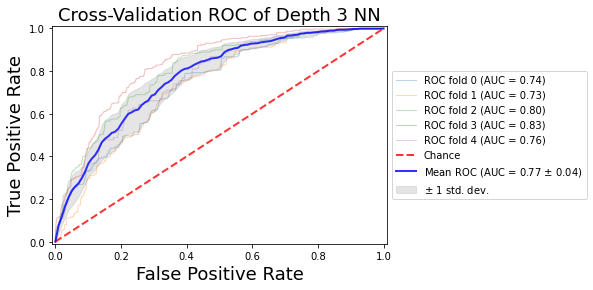

In [8]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

n_classes = 19

acc_per_fold = []
f1_per_fold = []
time_per_fold = []


acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d3.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d3 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    
    decoding_d3, time_mwpm = do_new_decoding(x_test_d3, 3, .03)
    decoding_d3['combine'] = decoding_d3[[0, 1]].values.tolist()
    decoding_d3['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d3 = np.array(decoding_d3[0])

    time_per_fold_mwpm.append(time_mwpm)

    pred_mwpm = mlb_d3.transform(decoding_d3)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb_d3)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))


    #####################################################################################################
    #test the plut decoder for this fold

    lookup_d3 = lookup_decoder(3)

    lookup_d3 = train_plut(lookup_d3, inputs_train, targets[train])

    start = time.time_ns()
    pred_plut_d3 = test_plut(lookup_d3, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d3)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d3, mlb_d3)

    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d3, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold

    model = compile_FFNN_cv_model_DepthThree(3)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model

    history = model.fit(
        inputs_train, targets[train],
        validation_split=.2,
        epochs=200,
        verbose=1)

   # Generate generalization metrics
    scores = model.evaluate(inputs_test, targets[test], verbose=0)

    #get the time to predicting test
    start = time.time_ns()
    predictions_d3 = model.predict(inputs_test) #change here
    end = time.time_ns()
    time_per_fold.append((end - start)/ (10 ** 9))

    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d3.copy() #change here
    pred[pred>=.1]=1 
    pred[pred<.1]=0
    
    if fold_no <5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb_d3)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    #####################################################################################################
    #comput ROC AUC for classes and the mircoaverage
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d3.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d3[:, i]) #change here
        aucs_classes[mlb_d3.classes_[i]].append(auc(fpr[i], tpr[i]))
        
    # Increase fold number
    fold_no = fold_no + 1
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

print("Begin McNemar's test")
for class_ in mlb_d3.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1] 
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
print("End McNemar's test")    

############print mean and stdev of AUC of each class#####################      
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("#####################################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("#####################################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("#####################################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 3 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
print(mcnemar_results_mwpm)
print(mcnemar_results_plut)

{'': 0, 'X00': 17.454545454545453, 'X01': 46.81666666666667, 'X02': 23.672131147540984, 'X10': 21.81132075471698, 'X11': 2.56, 'X12': 36.89411764705882, 'X20': 64.4235294117647, 'X21': 39.44642857142857, 'X22': 30.42, 'Z00': 31.879310344827587, 'Z01': 41.37931034482759, 'Z02': 27.245283018867923, 'Z10': 28.8, 'Z11': 12.25, 'Z12': 20.023809523809526, 'Z20': 44.46296296296296, 'Z21': 42.48076923076923, 'Z22': 9.76271186440678}
{'': 0, 'X00': 20.833333333333332, 'X01': 21.55128205128205, 'X02': 32.66129032258065, 'X10': 32.595238095238095, 'X11': 12.5, 'X12': 37.77049180327869, 'X20': 65.12676056338029, 'X21': 47.16981132075472, 'X22': 40.19565217391305, 'Z00': 24.107142857142858, 'Z01': 42.875, 'Z02': 37.53191489361702, 'Z10': 38.20454545454545, 'Z11': 26.28125, 'Z12': 26.256410256410255, 'Z20': 48.43103448275862, 'Z21': 42.48076923076923, 'Z22': 14.79245283018868}


# D5 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D5:
* Original:
    - "depth5_all_combos.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d5-1000.csv"
    - "v2samples-d5-10000.csv"
    - "v2samples-d5-100000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d5-1000.csv"
    - "v3samples-d5-10000.csv"

In [76]:
start_time = time.time()
trainData_d5 = pd.read_csv("SAMPLES/v3samples-d5-10000.csv")

trainData_d5 = trainData_d5.applymap(lambda x: add_noise(x,.01)) #was .05

#These four lines remove duplicates
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))
trainData_d5['Labels'] = trainData_d5['Labels'].astype(str)
trainData_d5 = trainData_d5.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))

testData_d5_MWPM = graph_with_errs_d5(trainData_d5)

#transforms the data to encoding for ML
mlb = MultiLabelBinarizer()
mlb.fit(trainData_d5['Labels'])
df = pd.DataFrame(mlb.transform(trainData_d5['Labels']))
df['Labels']= df.values.tolist()
trainData_d5 = trainData_d5.drop(['Labels'], axis=1)
trainData_d5 = pd.concat([df["Labels"], testData_d5_MWPM, trainData_d5], axis=1, ignore_index=True)
trainData_d5.columns = ["Labels","XSyn", "ZSyn","X0","Z1","X2","X3","Z4","X5","Z6","Z7","X8","Z9","X10","Z11","Z12","X13","Z14","X15","Z16","Z17","X18","X19","Z20","X21","X22","Z23"]

y_d5 = trainData_d5["Labels"] 
x_d5 = trainData_d5.drop(["Labels"], axis=1) 

x_d5 = x_d5.replace([-1], 0)
print("Data imported and formatted in %s seconds" % (time.time() - start_time))

Data imported and formatted in 40.07048797607422 seconds


### Fit model on training data

In [77]:
start_time = time.time()
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d5.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d5 = inputs[:,2:]
train_output_d5 = targets

x_train_d5, x_test_d5, Y_train_d5, Y_test_d5 = train_test_split(train_input_d5, train_output_d5, train_size=0.75, shuffle=True)

model_d5 = compile_FFNN_cv_model_DepthFive(5)
print("Fit model on training data")
history = model_d5.fit(
    x=x_train_d5,
    y=Y_train_d5,
    validation_split=.25,
    epochs=500
)
model_d5.summary()
print("Model trained in %s seconds" % (time.time() - start_time))

Fit model on training data
Train on 5625 samples, validate on 1875 samples
Epoch 1/500
5625/5625 [==============================] - 1s 97us/step - loss: 0.4833 - accuracy: 0.8327 - val_loss: 0.2564 - val_accuracy: 0.9288
Epoch 2/500
5625/5625 [==============================] - 0s 75us/step - loss: 0.2542 - accuracy: 0.9290 - val_loss: 0.2540 - val_accuracy: 0.9288
Epoch 3/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.2533 - accuracy: 0.9290 - val_loss: 0.2536 - val_accuracy: 0.9288
Epoch 4/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2529 - accuracy: 0.9290 - val_loss: 0.2534 - val_accuracy: 0.9288
Epoch 5/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2527 - accuracy: 0.9290 - val_loss: 0.2529 - val_accuracy: 0.9288
Epoch 6/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2523 - accuracy: 0.9290 - val_loss: 0.2526 - val_accuracy: 0.9288
Epoch 7/500
5625/5625 [==========================

Epoch 112/500
5625/5625 [==============================] - 0s 75us/step - loss: 0.1750 - accuracy: 0.9361 - val_loss: 0.1795 - val_accuracy: 0.9354
Epoch 113/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.1745 - accuracy: 0.9363 - val_loss: 0.1791 - val_accuracy: 0.9356
Epoch 114/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1741 - accuracy: 0.9362 - val_loss: 0.1787 - val_accuracy: 0.9360
Epoch 115/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.1736 - accuracy: 0.9365 - val_loss: 0.1782 - val_accuracy: 0.9361
Epoch 116/500
5625/5625 [==============================] - 0s 76us/step - loss: 0.1731 - accuracy: 0.9367 - val_loss: 0.1786 - val_accuracy: 0.9357
Epoch 117/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.1728 - accuracy: 0.9367 - val_loss: 0.1773 - val_accuracy: 0.9363
Epoch 118/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1722 - accuracy: 0.9369 - val_

5625/5625 [==============================] - 0s 71us/step - loss: 0.1471 - accuracy: 0.9450 - val_loss: 0.1559 - val_accuracy: 0.9434
Epoch 223/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1470 - accuracy: 0.9452 - val_loss: 0.1558 - val_accuracy: 0.9438
Epoch 224/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1468 - accuracy: 0.9451 - val_loss: 0.1558 - val_accuracy: 0.9432
Epoch 225/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1466 - accuracy: 0.9451 - val_loss: 0.1557 - val_accuracy: 0.9437
Epoch 226/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1464 - accuracy: 0.9453 - val_loss: 0.1557 - val_accuracy: 0.9435
Epoch 227/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1462 - accuracy: 0.9452 - val_loss: 0.1552 - val_accuracy: 0.9435
Epoch 228/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1460 - accuracy: 0.9454 - val_loss: 0.1550 -

5625/5625 [==============================] - 0s 71us/step - loss: 0.1313 - accuracy: 0.9499 - val_loss: 0.1469 - val_accuracy: 0.9467
Epoch 333/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1312 - accuracy: 0.9497 - val_loss: 0.1465 - val_accuracy: 0.9466
Epoch 334/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1310 - accuracy: 0.9499 - val_loss: 0.1472 - val_accuracy: 0.9464
Epoch 335/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1310 - accuracy: 0.9499 - val_loss: 0.1463 - val_accuracy: 0.9471
Epoch 336/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1309 - accuracy: 0.9500 - val_loss: 0.1465 - val_accuracy: 0.9464
Epoch 337/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1308 - accuracy: 0.9501 - val_loss: 0.1463 - val_accuracy: 0.9467
Epoch 338/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1307 - accuracy: 0.9499 - val_loss: 0.1466 -

5625/5625 [==============================] - 0s 68us/step - loss: 0.1212 - accuracy: 0.9531 - val_loss: 0.1442 - val_accuracy: 0.9468
Epoch 443/500
5625/5625 [==============================] - 0s 68us/step - loss: 0.1211 - accuracy: 0.9530 - val_loss: 0.1442 - val_accuracy: 0.9471
Epoch 444/500
5625/5625 [==============================] - 0s 68us/step - loss: 0.1210 - accuracy: 0.9531 - val_loss: 0.1441 - val_accuracy: 0.9475
Epoch 445/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1208 - accuracy: 0.9530 - val_loss: 0.1437 - val_accuracy: 0.9475
Epoch 446/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1208 - accuracy: 0.9532 - val_loss: 0.1438 - val_accuracy: 0.9476
Epoch 447/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1207 - accuracy: 0.9529 - val_loss: 0.1438 - val_accuracy: 0.9473
Epoch 448/500
5625/5625 [==============================] - 0s 68us/step - loss: 0.1207 - accuracy: 0.9532 - val_loss: 0.1441 -

In [78]:
predictions_d5 = model_d5.predict(x_test_d5)

y_pred = predictions_d5
y_test = Y_test_d5

y_pred[y_pred>=.5]=1 
y_pred[y_pred<.5]=0

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)-1):
    for j in range(len(y_test[0])-1):
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 1:
            TP += 1
        if y_pred[i][j] == 1 and y_test[i][j] != y_pred[i][j]:
            FP += 1
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 0:
            TN += 1
        if y_pred[i][j] == 0 and y_test[i][j] != y_pred[i][j]:
            FN += 1
            
print("True positive:   " + str(TP) + "\nFalse positive:  " + str(FP) + "\nTrue negative:   " + str(TN) + "\nFalse negative:  " + str(FN))

True positive:   4065
False positive:  1702
True negative:   114457
False negative:  4776


### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

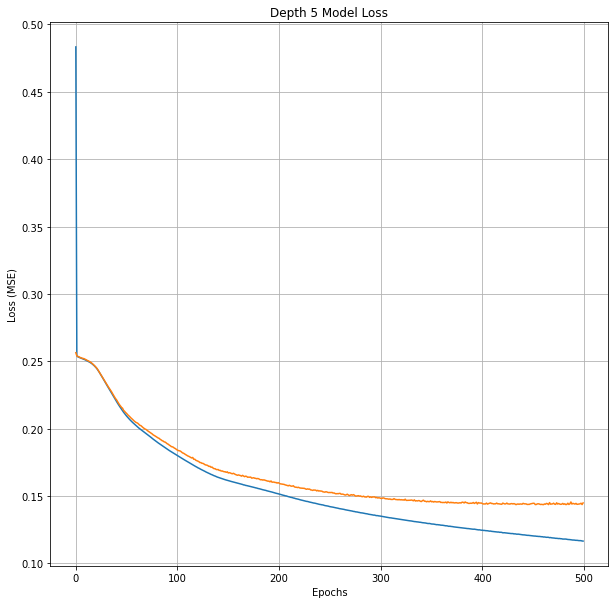

In [79]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 5 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

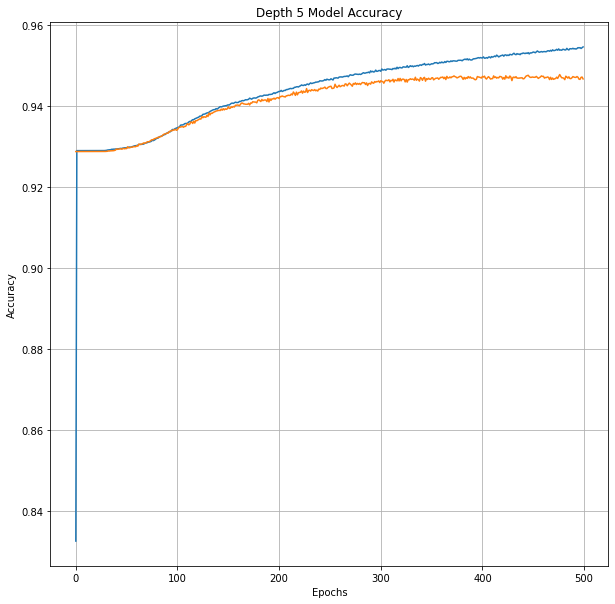

In [80]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 5 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [81]:
model_d5.save("model_d5_v3-10k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 6000 samples, validate on 2000 samples
Epoch 1/800
6000/6000 [==============================] - 1s 91us/step - loss: 0.4216 - accuracy: 0.8535 - val_loss: 0.2670 - val_accuracy: 0.9246
Epoch 2/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2494 - accuracy: 0.9307 - val_loss: 0.2655 - val_accuracy: 0.9246
Epoch 3/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2488 - accuracy: 0.9307 - val_loss: 0.2651 - val_accuracy: 0.9246
Epoch 4/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2485 - accuracy: 0.9307 - val_loss: 0.2649 - val_accuracy: 0.9246
Epoch 5/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.2481 - accuracy: 0.9307 - val_loss: 0.2643 - val_accuracy: 0.9246
Epoch 6/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2478 - accuracy: 0.9307 - val_loss: 0.2641 - 

Epoch 56/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1863 - accuracy: 0.9345 - val_loss: 0.2042 - val_accuracy: 0.9274
Epoch 57/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1853 - accuracy: 0.9347 - val_loss: 0.2034 - val_accuracy: 0.9277
Epoch 58/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1843 - accuracy: 0.9348 - val_loss: 0.2023 - val_accuracy: 0.9280
Epoch 59/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1834 - accuracy: 0.9350 - val_loss: 0.2017 - val_accuracy: 0.9277
Epoch 60/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1825 - accuracy: 0.9353 - val_loss: 0.2008 - val_accuracy: 0.9282
Epoch 61/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1815 - accuracy: 0.9355 - val_loss: 0.2002 - val_accuracy: 0.9286
Epoch 62/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1807 - accuracy: 0.9355 - val_loss: 0

6000/6000 [==============================] - 0s 74us/step - loss: 0.1455 - accuracy: 0.9467 - val_loss: 0.1681 - val_accuracy: 0.9376
Epoch 167/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1452 - accuracy: 0.9469 - val_loss: 0.1684 - val_accuracy: 0.9377
Epoch 168/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1451 - accuracy: 0.9470 - val_loss: 0.1685 - val_accuracy: 0.9381
Epoch 169/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1448 - accuracy: 0.9469 - val_loss: 0.1685 - val_accuracy: 0.9380
Epoch 170/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1447 - accuracy: 0.9470 - val_loss: 0.1678 - val_accuracy: 0.9381
Epoch 171/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1445 - accuracy: 0.9470 - val_loss: 0.1677 - val_accuracy: 0.9377
Epoch 172/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1444 - accuracy: 0.9471 - val_loss: 0.1677 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1297 - accuracy: 0.9511 - val_loss: 0.1571 - val_accuracy: 0.9417
Epoch 277/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1296 - accuracy: 0.9514 - val_loss: 0.1563 - val_accuracy: 0.9411
Epoch 278/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1295 - accuracy: 0.9514 - val_loss: 0.1570 - val_accuracy: 0.9421
Epoch 279/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1294 - accuracy: 0.9516 - val_loss: 0.1569 - val_accuracy: 0.9416
Epoch 280/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1293 - accuracy: 0.9513 - val_loss: 0.1563 - val_accuracy: 0.9418
Epoch 281/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1291 - accuracy: 0.9513 - val_loss: 0.1569 - val_accuracy: 0.9418
Epoch 282/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1291 - accuracy: 0.9513 - val_loss: 0.1564 -

6000/6000 [==============================] - 0s 68us/step - loss: 0.1197 - accuracy: 0.9539 - val_loss: 0.1535 - val_accuracy: 0.9424
Epoch 387/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1197 - accuracy: 0.9536 - val_loss: 0.1534 - val_accuracy: 0.9421
Epoch 388/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1197 - accuracy: 0.9538 - val_loss: 0.1531 - val_accuracy: 0.9421
Epoch 389/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1194 - accuracy: 0.9535 - val_loss: 0.1532 - val_accuracy: 0.9424
Epoch 390/800
6000/6000 [==============================] - 0s 67us/step - loss: 0.1195 - accuracy: 0.9538 - val_loss: 0.1527 - val_accuracy: 0.9425
Epoch 391/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1194 - accuracy: 0.9539 - val_loss: 0.1530 - val_accuracy: 0.9428
Epoch 392/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1193 - accuracy: 0.9537 - val_loss: 0.1538 -

6000/6000 [==============================] - 0s 71us/step - loss: 0.1123 - accuracy: 0.9563 - val_loss: 0.1553 - val_accuracy: 0.9416
Epoch 497/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1122 - accuracy: 0.9564 - val_loss: 0.1554 - val_accuracy: 0.9415
Epoch 498/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1123 - accuracy: 0.9564 - val_loss: 0.1544 - val_accuracy: 0.9411
Epoch 499/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1122 - accuracy: 0.9562 - val_loss: 0.1542 - val_accuracy: 0.9418
Epoch 500/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1121 - accuracy: 0.9563 - val_loss: 0.1543 - val_accuracy: 0.9415
Epoch 501/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1120 - accuracy: 0.9563 - val_loss: 0.1546 - val_accuracy: 0.9414
Epoch 502/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1119 - accuracy: 0.9566 - val_loss: 0.1542 -

6000/6000 [==============================] - 0s 70us/step - loss: 0.1053 - accuracy: 0.9585 - val_loss: 0.1579 - val_accuracy: 0.9406
Epoch 607/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1053 - accuracy: 0.9587 - val_loss: 0.1584 - val_accuracy: 0.9405
Epoch 608/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1052 - accuracy: 0.9587 - val_loss: 0.1575 - val_accuracy: 0.9402
Epoch 609/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1052 - accuracy: 0.9589 - val_loss: 0.1585 - val_accuracy: 0.9399
Epoch 610/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1051 - accuracy: 0.9588 - val_loss: 0.1590 - val_accuracy: 0.9403
Epoch 611/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1051 - accuracy: 0.9589 - val_loss: 0.1591 - val_accuracy: 0.9402
Epoch 612/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1049 - accuracy: 0.9590 - val_loss: 0.1584 -

6000/6000 [==============================] - 0s 68us/step - loss: 0.0982 - accuracy: 0.9616 - val_loss: 0.1639 - val_accuracy: 0.9393
Epoch 717/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.0982 - accuracy: 0.9614 - val_loss: 0.1653 - val_accuracy: 0.9383
Epoch 718/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.0980 - accuracy: 0.9616 - val_loss: 0.1647 - val_accuracy: 0.9390
Epoch 719/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0980 - accuracy: 0.9615 - val_loss: 0.1652 - val_accuracy: 0.9395
Epoch 720/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.0980 - accuracy: 0.9616 - val_loss: 0.1645 - val_accuracy: 0.9398
Epoch 721/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.0978 - accuracy: 0.9614 - val_loss: 0.1650 - val_accuracy: 0.9398
Epoch 722/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.0977 - accuracy: 0.9616 - val_loss: 0.1665 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 2 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 91us/step - loss: 0.4401 - accuracy: 0.8509 - val_loss: 0.2687 - val_accuracy: 0.9250
Epoch 2/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2520 - accuracy: 0.9304 - val_loss: 0.2667 - val_accuracy: 0.9250
Epoch 3/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2510 - accuracy: 0.9304 - val_loss: 0.2660 - val_accuracy: 0.9250
Epoch 4/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2504 - accuracy: 0.9304 - val_loss: 0.2653 - val_accuracy: 0.9250
Epoch 5/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2499 - accuracy: 0.9304 - val_loss: 0.2648 - val_accuracy: 0.9250
Epoch 6/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2494 - accuracy: 0.9304 - val_loss: 0.2644 - 

Epoch 56/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1901 - accuracy: 0.9335 - val_loss: 0.2062 - val_accuracy: 0.9279
Epoch 57/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1892 - accuracy: 0.9336 - val_loss: 0.2051 - val_accuracy: 0.9283
Epoch 58/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1883 - accuracy: 0.9338 - val_loss: 0.2047 - val_accuracy: 0.9286
Epoch 59/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1874 - accuracy: 0.9340 - val_loss: 0.2039 - val_accuracy: 0.9289
Epoch 60/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1865 - accuracy: 0.9343 - val_loss: 0.2032 - val_accuracy: 0.9287
Epoch 61/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1857 - accuracy: 0.9345 - val_loss: 0.2023 - val_accuracy: 0.9286
Epoch 62/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1849 - accuracy: 0.9345 - val_loss: 0

6000/6000 [==============================] - 0s 74us/step - loss: 0.1479 - accuracy: 0.9462 - val_loss: 0.1682 - val_accuracy: 0.9384
Epoch 167/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1478 - accuracy: 0.9459 - val_loss: 0.1689 - val_accuracy: 0.9383
Epoch 168/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1476 - accuracy: 0.9460 - val_loss: 0.1681 - val_accuracy: 0.9386
Epoch 169/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1474 - accuracy: 0.9461 - val_loss: 0.1679 - val_accuracy: 0.9386
Epoch 170/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1473 - accuracy: 0.9462 - val_loss: 0.1681 - val_accuracy: 0.9382
Epoch 171/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1471 - accuracy: 0.9461 - val_loss: 0.1680 - val_accuracy: 0.9382
Epoch 172/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1469 - accuracy: 0.9462 - val_loss: 0.1678 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1312 - accuracy: 0.9509 - val_loss: 0.1562 - val_accuracy: 0.9419
Epoch 277/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1311 - accuracy: 0.9510 - val_loss: 0.1562 - val_accuracy: 0.9415
Epoch 278/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1310 - accuracy: 0.9509 - val_loss: 0.1567 - val_accuracy: 0.9417
Epoch 279/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1309 - accuracy: 0.9509 - val_loss: 0.1562 - val_accuracy: 0.9420
Epoch 280/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1308 - accuracy: 0.9510 - val_loss: 0.1555 - val_accuracy: 0.9422
Epoch 281/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1306 - accuracy: 0.9509 - val_loss: 0.1561 - val_accuracy: 0.9418
Epoch 282/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1305 - accuracy: 0.9511 - val_loss: 0.1552 -

Epoch 386/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1212 - accuracy: 0.9534 - val_loss: 0.1526 - val_accuracy: 0.9423
Epoch 387/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1212 - accuracy: 0.9535 - val_loss: 0.1529 - val_accuracy: 0.9428
Epoch 388/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1210 - accuracy: 0.9536 - val_loss: 0.1525 - val_accuracy: 0.9432
Epoch 389/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1210 - accuracy: 0.9538 - val_loss: 0.1532 - val_accuracy: 0.9432
Epoch 390/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1209 - accuracy: 0.9536 - val_loss: 0.1528 - val_accuracy: 0.9426
Epoch 391/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1208 - accuracy: 0.9536 - val_loss: 0.1533 - val_accuracy: 0.9424
Epoch 392/800
6000/6000 [==============================] - 1s 84us/step - loss: 0.1208 - accuracy: 0.9536 - val_

6000/6000 [==============================] - 0s 74us/step - loss: 0.1138 - accuracy: 0.9558 - val_loss: 0.1535 - val_accuracy: 0.9418
Epoch 496/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1138 - accuracy: 0.9558 - val_loss: 0.1537 - val_accuracy: 0.9428
Epoch 497/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1137 - accuracy: 0.9560 - val_loss: 0.1533 - val_accuracy: 0.9423
Epoch 498/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1136 - accuracy: 0.9558 - val_loss: 0.1536 - val_accuracy: 0.9425
Epoch 499/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1135 - accuracy: 0.9560 - val_loss: 0.1535 - val_accuracy: 0.9419
Epoch 500/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1135 - accuracy: 0.9560 - val_loss: 0.1535 - val_accuracy: 0.9421
Epoch 501/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1135 - accuracy: 0.9557 - val_loss: 0.1537 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1068 - accuracy: 0.9582 - val_loss: 0.1560 - val_accuracy: 0.9415
Epoch 606/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1068 - accuracy: 0.9581 - val_loss: 0.1559 - val_accuracy: 0.9413
Epoch 607/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1574 - val_accuracy: 0.9420
Epoch 608/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1067 - accuracy: 0.9582 - val_loss: 0.1573 - val_accuracy: 0.9410
Epoch 609/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1067 - accuracy: 0.9582 - val_loss: 0.1565 - val_accuracy: 0.9411
Epoch 610/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1066 - accuracy: 0.9582 - val_loss: 0.1559 - val_accuracy: 0.9414
Epoch 611/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1065 - accuracy: 0.9582 - val_loss: 0.1569 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0997 - accuracy: 0.9609 - val_loss: 0.1622 - val_accuracy: 0.9402
Epoch 716/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0997 - accuracy: 0.9610 - val_loss: 0.1619 - val_accuracy: 0.9410
Epoch 717/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0995 - accuracy: 0.9611 - val_loss: 0.1619 - val_accuracy: 0.9395
Epoch 718/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.0996 - accuracy: 0.9609 - val_loss: 0.1628 - val_accuracy: 0.9406
Epoch 719/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0995 - accuracy: 0.9614 - val_loss: 0.1626 - val_accuracy: 0.9410
Epoch 720/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0994 - accuracy: 0.9612 - val_loss: 0.1621 - val_accuracy: 0.9396
Epoch 721/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0992 - accuracy: 0.9613 - val_loss: 0.1633 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 92us/step - loss: 0.4272 - accuracy: 0.8553 - val_loss: 0.2680 - val_accuracy: 0.9248
Epoch 2/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.2517 - accuracy: 0.9302 - val_loss: 0.2664 - val_accuracy: 0.9248
Epoch 3/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2510 - accuracy: 0.9302 - val_loss: 0.2658 - val_accuracy: 0.9248
Epoch 4/800
6000/6000 [==============================] - 1s 94us/step - loss: 0.2505 - accuracy: 0.9302 - val_loss: 0.2655 - val_accuracy: 0.9248
Epoch 5/800
6000/6000 [==============================] - 1s 87us/step - loss: 0.2501 - accuracy: 0.9302 - val_loss: 0.2649 - val_accuracy: 0.9248
Epoch 6/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.2497 - accuracy: 0.9302 - val_loss: 0.2644 - 

Epoch 56/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1913 - accuracy: 0.9328 - val_loss: 0.2061 - val_accuracy: 0.9272
Epoch 57/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1902 - accuracy: 0.9331 - val_loss: 0.2048 - val_accuracy: 0.9269
Epoch 58/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1891 - accuracy: 0.9332 - val_loss: 0.2037 - val_accuracy: 0.9271
Epoch 59/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1880 - accuracy: 0.9333 - val_loss: 0.2026 - val_accuracy: 0.9274
Epoch 60/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1870 - accuracy: 0.9335 - val_loss: 0.2016 - val_accuracy: 0.9276
Epoch 61/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1860 - accuracy: 0.9337 - val_loss: 0.2010 - val_accuracy: 0.9274
Epoch 62/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1851 - accuracy: 0.9338 - val_loss: 0

6000/6000 [==============================] - 0s 79us/step - loss: 0.1463 - accuracy: 0.9462 - val_loss: 0.1672 - val_accuracy: 0.9387
Epoch 167/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1461 - accuracy: 0.9463 - val_loss: 0.1661 - val_accuracy: 0.9395
Epoch 168/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1459 - accuracy: 0.9463 - val_loss: 0.1661 - val_accuracy: 0.9392
Epoch 169/800
6000/6000 [==============================] - 1s 101us/step - loss: 0.1458 - accuracy: 0.9463 - val_loss: 0.1661 - val_accuracy: 0.9392
Epoch 170/800
6000/6000 [==============================] - 1s 84us/step - loss: 0.1456 - accuracy: 0.9464 - val_loss: 0.1659 - val_accuracy: 0.9393
Epoch 171/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1454 - accuracy: 0.9465 - val_loss: 0.1654 - val_accuracy: 0.9394
Epoch 172/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1452 - accuracy: 0.9465 - val_loss: 0.1653 

6000/6000 [==============================] - 0s 72us/step - loss: 0.1312 - accuracy: 0.9504 - val_loss: 0.1561 - val_accuracy: 0.9424
Epoch 277/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1311 - accuracy: 0.9506 - val_loss: 0.1560 - val_accuracy: 0.9422
Epoch 278/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1311 - accuracy: 0.9503 - val_loss: 0.1560 - val_accuracy: 0.9426
Epoch 279/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1309 - accuracy: 0.9504 - val_loss: 0.1563 - val_accuracy: 0.9424
Epoch 280/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1308 - accuracy: 0.9505 - val_loss: 0.1565 - val_accuracy: 0.9428
Epoch 281/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1307 - accuracy: 0.9507 - val_loss: 0.1565 - val_accuracy: 0.9420
Epoch 282/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1307 - accuracy: 0.9505 - val_loss: 0.1563 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1222 - accuracy: 0.9531 - val_loss: 0.1539 - val_accuracy: 0.9413
Epoch 387/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1221 - accuracy: 0.9530 - val_loss: 0.1544 - val_accuracy: 0.9425
Epoch 388/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1221 - accuracy: 0.9530 - val_loss: 0.1543 - val_accuracy: 0.9422
Epoch 389/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1220 - accuracy: 0.9530 - val_loss: 0.1540 - val_accuracy: 0.9418
Epoch 390/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1218 - accuracy: 0.9532 - val_loss: 0.1544 - val_accuracy: 0.9419
Epoch 391/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1217 - accuracy: 0.9533 - val_loss: 0.1543 - val_accuracy: 0.9422
Epoch 392/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1217 - accuracy: 0.9532 - val_loss: 0.1538 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1145 - accuracy: 0.9556 - val_loss: 0.1552 - val_accuracy: 0.9420
Epoch 497/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1143 - accuracy: 0.9556 - val_loss: 0.1550 - val_accuracy: 0.9423
Epoch 498/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1143 - accuracy: 0.9556 - val_loss: 0.1551 - val_accuracy: 0.9411
Epoch 499/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1142 - accuracy: 0.9556 - val_loss: 0.1550 - val_accuracy: 0.9420
Epoch 500/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1141 - accuracy: 0.9555 - val_loss: 0.1547 - val_accuracy: 0.9418
Epoch 501/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1142 - accuracy: 0.9555 - val_loss: 0.1551 - val_accuracy: 0.9420
Epoch 502/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1139 - accuracy: 0.9557 - val_loss: 0.1554 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1071 - accuracy: 0.9581 - val_loss: 0.1583 - val_accuracy: 0.9407
Epoch 607/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1069 - accuracy: 0.9584 - val_loss: 0.1586 - val_accuracy: 0.9416
Epoch 608/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1070 - accuracy: 0.9583 - val_loss: 0.1583 - val_accuracy: 0.9407
Epoch 609/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1592 - val_accuracy: 0.9406
Epoch 610/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1599 - val_accuracy: 0.9408
Epoch 611/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1591 - val_accuracy: 0.9410
Epoch 612/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1066 - accuracy: 0.9582 - val_loss: 0.1609 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0994 - accuracy: 0.9613 - val_loss: 0.1651 - val_accuracy: 0.9399
Epoch 717/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.0994 - accuracy: 0.9611 - val_loss: 0.1655 - val_accuracy: 0.9399
Epoch 718/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.0993 - accuracy: 0.9612 - val_loss: 0.1659 - val_accuracy: 0.9400
Epoch 719/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0993 - accuracy: 0.9612 - val_loss: 0.1660 - val_accuracy: 0.9398
Epoch 720/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.0992 - accuracy: 0.9614 - val_loss: 0.1664 - val_accuracy: 0.9396
Epoch 721/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0991 - accuracy: 0.9612 - val_loss: 0.1680 - val_accuracy: 0.9389
Epoch 722/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0990 - accuracy: 0.9613 - val_loss: 0.1672 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 4 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 93us/step - loss: 0.3886 - accuracy: 0.8688 - val_loss: 0.2650 - val_accuracy: 0.9250
Epoch 2/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2491 - accuracy: 0.9306 - val_loss: 0.2642 - val_accuracy: 0.9250
Epoch 3/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.2486 - accuracy: 0.9306 - val_loss: 0.2638 - val_accuracy: 0.9250
Epoch 4/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2483 - accuracy: 0.9306 - val_loss: 0.2634 - val_accuracy: 0.9250
Epoch 5/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2480 - accuracy: 0.9306 - val_loss: 0.2631 - val_accuracy: 0.9250
Epoch 6/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2477 - accuracy: 0.9306 - val_loss: 0.2629 - 

Epoch 56/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1870 - accuracy: 0.9333 - val_loss: 0.2025 - val_accuracy: 0.9273
Epoch 57/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1858 - accuracy: 0.9335 - val_loss: 0.2016 - val_accuracy: 0.9277
Epoch 58/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1848 - accuracy: 0.9338 - val_loss: 0.2008 - val_accuracy: 0.9276
Epoch 59/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1838 - accuracy: 0.9341 - val_loss: 0.2001 - val_accuracy: 0.9280
Epoch 60/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1828 - accuracy: 0.9342 - val_loss: 0.1989 - val_accuracy: 0.9280
Epoch 61/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1819 - accuracy: 0.9344 - val_loss: 0.1982 - val_accuracy: 0.9282
Epoch 62/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1811 - accuracy: 0.9347 - val_loss: 0

6000/6000 [==============================] - 0s 75us/step - loss: 0.1453 - accuracy: 0.9470 - val_loss: 0.1675 - val_accuracy: 0.9385
Epoch 167/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1452 - accuracy: 0.9469 - val_loss: 0.1669 - val_accuracy: 0.9389
Epoch 168/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1450 - accuracy: 0.9470 - val_loss: 0.1672 - val_accuracy: 0.9390
Epoch 169/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1448 - accuracy: 0.9470 - val_loss: 0.1664 - val_accuracy: 0.9389
Epoch 170/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1446 - accuracy: 0.9473 - val_loss: 0.1665 - val_accuracy: 0.9385
Epoch 171/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1445 - accuracy: 0.9473 - val_loss: 0.1662 - val_accuracy: 0.9387
Epoch 172/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1443 - accuracy: 0.9473 - val_loss: 0.1663 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1299 - accuracy: 0.9512 - val_loss: 0.1574 - val_accuracy: 0.9416
Epoch 277/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1297 - accuracy: 0.9510 - val_loss: 0.1569 - val_accuracy: 0.9413
Epoch 278/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1297 - accuracy: 0.9512 - val_loss: 0.1573 - val_accuracy: 0.9410
Epoch 279/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1296 - accuracy: 0.9512 - val_loss: 0.1574 - val_accuracy: 0.9411
Epoch 280/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1295 - accuracy: 0.9514 - val_loss: 0.1568 - val_accuracy: 0.9413
Epoch 281/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1294 - accuracy: 0.9513 - val_loss: 0.1571 - val_accuracy: 0.9419
Epoch 282/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1293 - accuracy: 0.9515 - val_loss: 0.1569 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1204 - accuracy: 0.9539 - val_loss: 0.1547 - val_accuracy: 0.9415
Epoch 387/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1203 - accuracy: 0.9538 - val_loss: 0.1546 - val_accuracy: 0.9414
Epoch 388/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1203 - accuracy: 0.9537 - val_loss: 0.1552 - val_accuracy: 0.9411
Epoch 389/800
6000/6000 [==============================] - 1s 104us/step - loss: 0.1201 - accuracy: 0.9539 - val_loss: 0.1556 - val_accuracy: 0.9414
Epoch 390/800
6000/6000 [==============================] - 1s 102us/step - loss: 0.1201 - accuracy: 0.9538 - val_loss: 0.1555 - val_accuracy: 0.9420
Epoch 391/800
6000/6000 [==============================] - 1s 101us/step - loss: 0.1199 - accuracy: 0.9542 - val_loss: 0.1552 - val_accuracy: 0.9418
Epoch 392/800
6000/6000 [==============================] - 1s 102us/step - loss: 0.1200 - accuracy: 0.9539 - val_loss: 0.15

6000/6000 [==============================] - 0s 80us/step - loss: 0.1127 - accuracy: 0.9563 - val_loss: 0.1559 - val_accuracy: 0.9417
Epoch 497/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1126 - accuracy: 0.9562 - val_loss: 0.1565 - val_accuracy: 0.9413
Epoch 498/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1125 - accuracy: 0.9564 - val_loss: 0.1564 - val_accuracy: 0.9414
Epoch 499/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1124 - accuracy: 0.9563 - val_loss: 0.1580 - val_accuracy: 0.9402
Epoch 500/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1123 - accuracy: 0.9564 - val_loss: 0.1563 - val_accuracy: 0.9418
Epoch 501/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1124 - accuracy: 0.9563 - val_loss: 0.1575 - val_accuracy: 0.9418
Epoch 502/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1123 - accuracy: 0.9563 - val_loss: 0.1557 -

6000/6000 [==============================] - 0s 82us/step - loss: 0.1054 - accuracy: 0.9588 - val_loss: 0.1598 - val_accuracy: 0.9406
Epoch 607/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1052 - accuracy: 0.9588 - val_loss: 0.1598 - val_accuracy: 0.9412
Epoch 608/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1052 - accuracy: 0.9589 - val_loss: 0.1606 - val_accuracy: 0.9411
Epoch 609/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1051 - accuracy: 0.9589 - val_loss: 0.1608 - val_accuracy: 0.9411
Epoch 610/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.1618 - val_accuracy: 0.9411
Epoch 611/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.1602 - val_accuracy: 0.9405
Epoch 612/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.1600 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0980 - accuracy: 0.9615 - val_loss: 0.1664 - val_accuracy: 0.9398
Epoch 717/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0979 - accuracy: 0.9618 - val_loss: 0.1668 - val_accuracy: 0.9398
Epoch 718/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0979 - accuracy: 0.9616 - val_loss: 0.1666 - val_accuracy: 0.9398
Epoch 719/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0978 - accuracy: 0.9619 - val_loss: 0.1655 - val_accuracy: 0.9401
Epoch 720/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0977 - accuracy: 0.9618 - val_loss: 0.1676 - val_accuracy: 0.9394
Epoch 721/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.0975 - accuracy: 0.9618 - val_loss: 0.1663 - val_accuracy: 0.9398
Epoch 722/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0975 - accuracy: 0.9619 - val_loss: 0.1671 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 5 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 95us/step - loss: 0.3443 - accuracy: 0.8909 - val_loss: 0.2654 - val_accuracy: 0.9247
Epoch 2/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.2496 - accuracy: 0.9304 - val_loss: 0.2647 - val_accuracy: 0.9247
Epoch 3/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2491 - accuracy: 0.9304 - val_loss: 0.2643 - val_accuracy: 0.9247
Epoch 4/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2487 - accuracy: 0.9304 - val_loss: 0.2641 - val_accuracy: 0.9247
Epoch 5/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2484 - accuracy: 0.9304 - val_loss: 0.2636 - val_accuracy: 0.9247
Epoch 6/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2481 - accuracy: 0.9304 - val_loss: 0.2633 - 

Epoch 56/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1921 - accuracy: 0.9328 - val_loss: 0.2088 - val_accuracy: 0.9270
Epoch 57/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1914 - accuracy: 0.9328 - val_loss: 0.2084 - val_accuracy: 0.9268
Epoch 58/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1907 - accuracy: 0.9331 - val_loss: 0.2077 - val_accuracy: 0.9270
Epoch 59/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1901 - accuracy: 0.9331 - val_loss: 0.2069 - val_accuracy: 0.9273
Epoch 60/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1894 - accuracy: 0.9332 - val_loss: 0.2066 - val_accuracy: 0.9271
Epoch 61/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1888 - accuracy: 0.9334 - val_loss: 0.2059 - val_accuracy: 0.9273
Epoch 62/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1882 - accuracy: 0.9333 - val_loss: 0

6000/6000 [==============================] - 0s 75us/step - loss: 0.1519 - accuracy: 0.9442 - val_loss: 0.1724 - val_accuracy: 0.9361
Epoch 167/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1516 - accuracy: 0.9442 - val_loss: 0.1726 - val_accuracy: 0.9359
Epoch 168/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1514 - accuracy: 0.9443 - val_loss: 0.1734 - val_accuracy: 0.9368
Epoch 169/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1512 - accuracy: 0.9443 - val_loss: 0.1722 - val_accuracy: 0.9368
Epoch 170/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1512 - accuracy: 0.9443 - val_loss: 0.1720 - val_accuracy: 0.9369
Epoch 171/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1509 - accuracy: 0.9444 - val_loss: 0.1720 - val_accuracy: 0.9369
Epoch 172/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1507 - accuracy: 0.9444 - val_loss: 0.1715 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1358 - accuracy: 0.9494 - val_loss: 0.1615 - val_accuracy: 0.9393
Epoch 277/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1357 - accuracy: 0.9493 - val_loss: 0.1624 - val_accuracy: 0.9391
Epoch 278/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1356 - accuracy: 0.9494 - val_loss: 0.1621 - val_accuracy: 0.9393
Epoch 279/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1355 - accuracy: 0.9495 - val_loss: 0.1622 - val_accuracy: 0.9395
Epoch 280/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1354 - accuracy: 0.9493 - val_loss: 0.1616 - val_accuracy: 0.9394
Epoch 281/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1353 - accuracy: 0.9494 - val_loss: 0.1613 - val_accuracy: 0.9395
Epoch 282/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1352 - accuracy: 0.9494 - val_loss: 0.1613 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1254 - accuracy: 0.9525 - val_loss: 0.1575 - val_accuracy: 0.9405
Epoch 387/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1254 - accuracy: 0.9525 - val_loss: 0.1577 - val_accuracy: 0.9407
Epoch 388/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1252 - accuracy: 0.9525 - val_loss: 0.1578 - val_accuracy: 0.9411
Epoch 389/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1252 - accuracy: 0.9524 - val_loss: 0.1577 - val_accuracy: 0.9405
Epoch 390/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1251 - accuracy: 0.9526 - val_loss: 0.1576 - val_accuracy: 0.9405
Epoch 391/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1250 - accuracy: 0.9525 - val_loss: 0.1581 - val_accuracy: 0.9400
Epoch 392/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1250 - accuracy: 0.9525 - val_loss: 0.1578 -

6000/6000 [==============================] - 0s 78us/step - loss: 0.1177 - accuracy: 0.9547 - val_loss: 0.1573 - val_accuracy: 0.9409
Epoch 497/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1178 - accuracy: 0.9547 - val_loss: 0.1584 - val_accuracy: 0.9408
Epoch 498/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1176 - accuracy: 0.9547 - val_loss: 0.1571 - val_accuracy: 0.9406
Epoch 499/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1176 - accuracy: 0.9545 - val_loss: 0.1575 - val_accuracy: 0.9406
Epoch 500/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1175 - accuracy: 0.9547 - val_loss: 0.1580 - val_accuracy: 0.9410
Epoch 501/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1175 - accuracy: 0.9547 - val_loss: 0.1576 - val_accuracy: 0.9412
Epoch 502/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1174 - accuracy: 0.9547 - val_loss: 0.1580 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1109 - accuracy: 0.9570 - val_loss: 0.1597 - val_accuracy: 0.9403
Epoch 607/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1107 - accuracy: 0.9570 - val_loss: 0.1601 - val_accuracy: 0.9397
Epoch 608/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1108 - accuracy: 0.9569 - val_loss: 0.1605 - val_accuracy: 0.9402
Epoch 609/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1108 - accuracy: 0.9567 - val_loss: 0.1602 - val_accuracy: 0.9393
Epoch 610/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1106 - accuracy: 0.9570 - val_loss: 0.1609 - val_accuracy: 0.9403
Epoch 611/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1105 - accuracy: 0.9570 - val_loss: 0.1601 - val_accuracy: 0.9400
Epoch 612/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1105 - accuracy: 0.9570 - val_loss: 0.1602 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1038 - accuracy: 0.9594 - val_loss: 0.1650 - val_accuracy: 0.9394
Epoch 717/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1038 - accuracy: 0.9593 - val_loss: 0.1658 - val_accuracy: 0.9393
Epoch 718/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1037 - accuracy: 0.9592 - val_loss: 0.1649 - val_accuracy: 0.9388
Epoch 719/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1036 - accuracy: 0.9595 - val_loss: 0.1662 - val_accuracy: 0.9387
Epoch 720/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1036 - accuracy: 0.9597 - val_loss: 0.1661 - val_accuracy: 0.9384
Epoch 721/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1037 - accuracy: 0.9598 - val_loss: 0.1648 - val_accuracy: 0.9392
Epoch 722/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1035 - accuracy: 0.9597 - val_loss: 0.1652 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[2000, 0]
[0, 0]
both b and c are zero
[1999, 1]
[0, 0]
[1776, 45]
[132, 47]
[1759, 62]
[20, 159]
[1810, 56]
[96, 38]
[1793, 73]
[49, 85]
[1901, 35]
[36, 28]
[1837, 99]
[24, 40]
[1892, 30]
[50, 28]
[1800, 122]
[49, 29]
[1700, 131]
[96, 73]
[1790, 41]
[36, 133]
[1702, 109]
[101, 88]
[1773, 38]
[55, 134]
[1840, 67]
[52, 41]
[1829, 78]
[30, 63]
[1856, 50]
[42, 52]
[1829, 77]
[34, 60]
[1806, 67]
[68, 59]
[1790, 83]
[59, 68]
[1775, 51]
[84, 90]
[1761, 65]
[67, 107]
[1763, 45]
[77, 115]
[1755, 53]
[66, 126]
[1792, 72]
[72, 64]
[1767, 97]
[70, 66]
[1844, 41]
[59, 56]
[1806, 79]
[45, 70]
[1837, 48]
[55, 60]
[1802, 83]
[31, 84]
[1744, 121]
[65, 70]
[1828, 37]
[22, 113]
[1753, 77]
[57, 113]
[1769, 61]
[77, 93]
[1815, 66]
[57, 62]
[1810, 71]
[42, 77]
[1865, 39]
[42, 54]
[1826, 78]
[35, 61]
[1866, 35]
[52, 47]
[1818, 83]
[46, 53]
[1793, 30]
[59, 118]
[1776, 47]
[53, 124]
[1726, 79]
[118, 77]
[1721, 84]
[102, 93]
[1921, 20]
[29, 30]
[1832, 109]
[19, 40]
[1932, 10]
[18, 40]
[1849, 93]
[19, 39]
[1912

<Figure size 720x720 with 0 Axes>

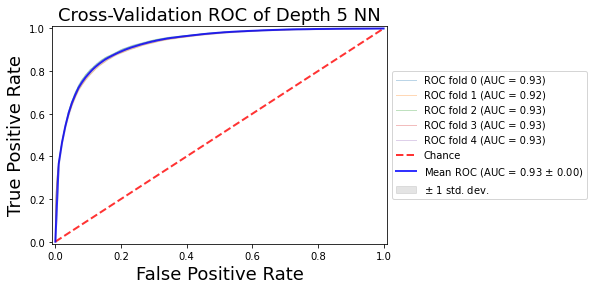

In [82]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d5)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 51

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d5 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    decoding_d5, time_mwpm = do_new_decoding(x_test_d5, 5, 0)
    decoding_d5['combine'] = decoding_d5[[0, 1]].values.tolist()
    decoding_d5['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d5 = np.array(decoding_d5[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb.transform(decoding_d5)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))
    
    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d5 = lookup_decoder(5)
    
    lookup_d5 = train_plut(lookup_d5, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d5 = test_plut(lookup_d5, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d5)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d5, mlb)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d5, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d5 = compile_FFNN_cv_model_DepthFive(5)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    history = model_d5.fit(
    inputs_train,
    targets[train],
    validation_split=.25,
    epochs = 800)
    
   # Generate generalization metrics
    scores = model_d5.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d5 = model_d5.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d5.copy() #change here
    pred[pred>=.4]=1 
    pred[pred<.4]=0
    
    if fold_no < 5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    
    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d5.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d5[:, i]) 
        aucs_classes[mlb.classes_[i]].append(auc(fpr[i], tpr[i]))
        
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("##############################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("##############################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("##############################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
    
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 5 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# D7 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D7:
* Original:
    - "depth7_all_combos.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d7-1000.csv"
    - "v2samples-d7-10000.csv"
    - "v2samples-d7-500000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d7-1000.csv"

In [15]:
start_time = time.time()
trainData_d7 = pd.read_csv("SAMPLES/v2samples-d7-100000.csv")
trainData_d7 = trainData_d7.applymap(lambda x: add_noise(x,.01))

#These four lines remove duplicates
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))
trainData_d7['Labels'] = trainData_d7['Labels'].astype(str)
trainData_d7 = trainData_d7.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))

testData_d7_MWPM = graph_with_errs_d7(trainData_d7)

#transforms the data to encoding for ML
mlb_d7 = MultiLabelBinarizer()
mlb_d7.fit(trainData_d7['Labels'])
df = pd.DataFrame(mlb_d7.transform(trainData_d7['Labels']))
df['Labels']= df.values.tolist()
trainData_d7 = trainData_d7.drop(['Labels'], axis=1)
trainData_d7 = pd.concat([df["Labels"],testData_d7_MWPM, trainData_d7], axis=1, ignore_index=True)
trainData_d7.columns = ["Labels","XSyn", "ZSyn","X0", "Z1", "X2", "X3", "Z4", "X5", "X6", "Z7", "X8", "Z9", "Z10", "X11", "Z12", "X13", "Z14", "X15", "Z16", "Z17", "X18", "Z19","X20", "Z21", "X22", "Z23", "Z24", "X25", "Z26", "X27", "Z28", "X29", "Z30", "Z31", "X32", "Z33", "X34", "Z35", "X36", "Z37", "Z38", "X39", "X40", "Z41", "X42", "X43", "Z44", "X45", "X46", "Z47"]

y_d7 = trainData_d7["Labels"]
x_d7 = trainData_d7.drop(["Labels"], axis=1)

x_d7 = x_d7.replace([-1], 0)
print("Data imported and formatted in %s seconds" % (time.time() - start_time))

Data imported and formatted in 779.2631597518921 seconds


### Fit model on training data

In [13]:
start_time = time.time()
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d7.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d7 = inputs[:,2:]
train_output_d7 = targets

x_train_d7, x_test_d7, Y_train_d7, Y_test_d7 = train_test_split(train_input_d7, train_output_d7, train_size=0.75, shuffle=True)

model_d7 = compile_FFNN_cv_model_DepthSeven(7)
print("Fit model on training data")
history = model_d7.fit(
    x=x_train_d7,
    y=Y_train_d7,
    validation_split=.25,
    epochs=150
)
model_d7.summary()
print("Model trained in %s seconds" % (time.time() - start_time))

Fit model on training data
Train on 562 samples, validate on 188 samples
Epoch 1/150
562/562 [==============================] - 0s 304us/step - loss: 0.6764 - accuracy: 0.6586 - val_loss: 0.6628 - val_accuracy: 0.7352
Epoch 2/150
562/562 [==============================] - 0s 110us/step - loss: 0.6487 - accuracy: 0.7747 - val_loss: 0.6266 - val_accuracy: 0.8182
Epoch 3/150
562/562 [==============================] - 0s 107us/step - loss: 0.5978 - accuracy: 0.8478 - val_loss: 0.5493 - val_accuracy: 0.8808
Epoch 4/150
562/562 [==============================] - 0s 107us/step - loss: 0.4816 - accuracy: 0.9032 - val_loss: 0.3786 - val_accuracy: 0.9355
Epoch 5/150
562/562 [==============================] - 0s 117us/step - loss: 0.2973 - accuracy: 0.9493 - val_loss: 0.2233 - val_accuracy: 0.9543
Epoch 6/150
562/562 [==============================] - 0s 114us/step - loss: 0.2050 - accuracy: 0.9543 - val_loss: 0.1916 - val_accuracy: 0.9543
Epoch 7/150
562/562 [==============================] - 0s

Epoch 57/150
562/562 [==============================] - 0s 121us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 58/150
562/562 [==============================] - 0s 110us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 59/150
562/562 [==============================] - 0s 116us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 60/150
562/562 [==============================] - 0s 112us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 61/150
562/562 [==============================] - 0s 119us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 62/150
562/562 [==============================] - 0s 110us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 63/150
562/562 [==============================] - 0s 116us/step - loss: 0.1828 - accuracy: 0.9543 - val_loss: 0.1833 -

562/562 [==============================] - 0s 119us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1828 - val_accuracy: 0.9543
Epoch 114/150
562/562 [==============================] - 0s 114us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1829 - val_accuracy: 0.9543
Epoch 115/150
562/562 [==============================] - 0s 119us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1829 - val_accuracy: 0.9543
Epoch 116/150
562/562 [==============================] - 0s 119us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1829 - val_accuracy: 0.9543
Epoch 117/150
562/562 [==============================] - 0s 119us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1828 - val_accuracy: 0.9543
Epoch 118/150
562/562 [==============================] - 0s 109us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1829 - val_accuracy: 0.9543
Epoch 119/150
562/562 [==============================] - 0s 110us/step - loss: 0.1822 - accuracy: 0.9543 - val_loss: 0.1829 - val_ac

In [14]:
predictions_d7 = model_d7.predict(x_test_d7)

y_pred = predictions_d7
y_test = Y_test_d7

y_pred[y_pred>=.5]=1 
y_pred[y_pred<.5]=0

TP = 0
FP = 0
TN = 0
FN = 0



for i in range(len(y_pred)-1):
    for j in range(len(y_test[0])-1):
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 1:
            TP += 1
        if y_pred[i][j] == 1 and y_test[i][j] != y_pred[i][j]:
            FP += 1
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 0:
            TN += 1
        if y_pred[i][j] == 0 and y_test[i][j] != y_pred[i][j]:
            FN += 1

        
print("True positive:   " + str(TP) + "\nFalse positive:  " + str(FP) + "\nTrue negative:   " + str(TN) + "\nFalse negative:  " + str(FN))



True positive:   0
False positive:  0
True negative:   23348
False negative:  1152


### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

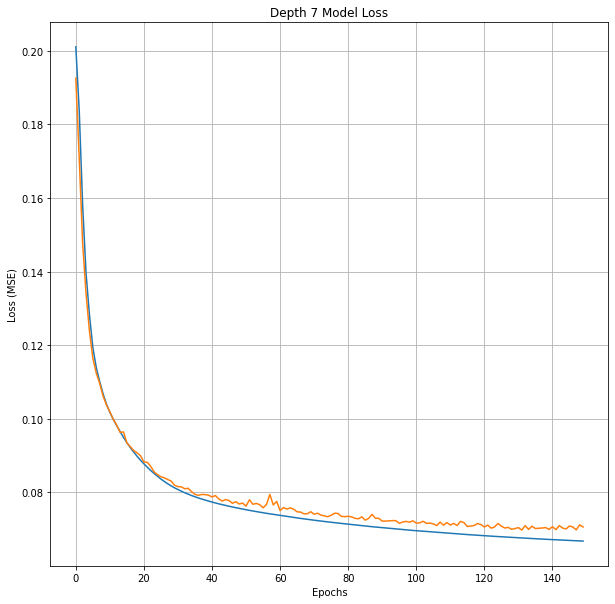

In [112]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 7 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

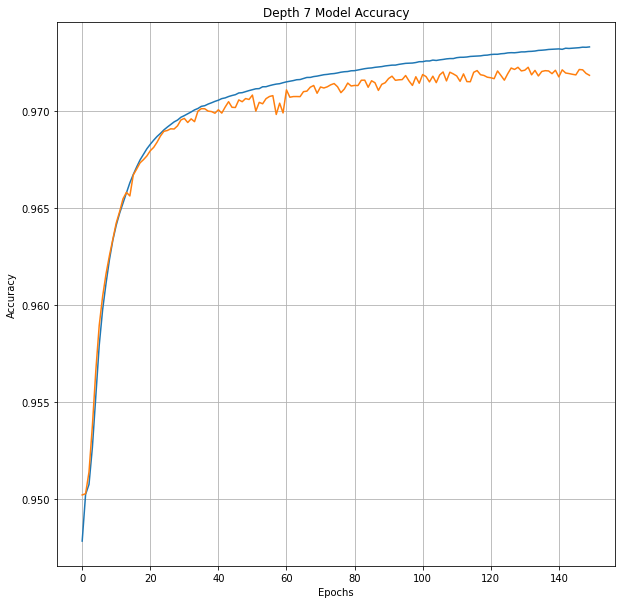

In [113]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 7 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [114]:
model_d7.save("model_d7_v2-500k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 45342 samples, validate on 15114 samples
Epoch 1/150
45342/45342 [==============================] - 5s 110us/step - loss: 0.2161 - accuracy: 0.9426 - val_loss: 0.1937 - val_accuracy: 0.9511
Epoch 2/150
45342/45342 [==============================] - 5s 107us/step - loss: 0.1901 - accuracy: 0.9521 - val_loss: 0.1930 - val_accuracy: 0.9511
Epoch 3/150
45342/45342 [==============================] - 5s 107us/step - loss: 0.1895 - accuracy: 0.9521 - val_loss: 0.1923 - val_accuracy: 0.9511
Epoch 4/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.1887 - accuracy: 0.9521 - val_loss: 0.1915 - val_accuracy: 0.9511
Epoch 5/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.1876 - accuracy: 0.9521 - val_loss: 0.1902 - val_accuracy: 0.9511
Epoch 6/150
45342/45342 [==============================] - 5s 113us/step - loss: 0.1862 - accuracy: 0.9521 -

Epoch 55/150
45342/45342 [==============================] - 5s 106us/step - loss: 0.0989 - accuracy: 0.9654 - val_loss: 0.1023 - val_accuracy: 0.9640
Epoch 56/150
45342/45342 [==============================] - 5s 109us/step - loss: 0.0985 - accuracy: 0.9655 - val_loss: 0.1020 - val_accuracy: 0.9642
Epoch 57/150
45342/45342 [==============================] - 5s 107us/step - loss: 0.0981 - accuracy: 0.9656 - val_loss: 0.1015 - val_accuracy: 0.9643
Epoch 58/150
45342/45342 [==============================] - 5s 107us/step - loss: 0.0978 - accuracy: 0.9658 - val_loss: 0.1012 - val_accuracy: 0.9645
Epoch 59/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.0974 - accuracy: 0.9659 - val_loss: 0.1008 - val_accuracy: 0.9646
Epoch 60/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.0971 - accuracy: 0.9661 - val_loss: 0.1006 - val_accuracy: 0.9646
Epoch 61/150
45342/45342 [==============================] - 5s 109us/step - loss: 0.0968 - accuracy:

45342/45342 [==============================] - 5s 116us/step - loss: 0.0846 - accuracy: 0.9698 - val_loss: 0.0891 - val_accuracy: 0.9682
Epoch 110/150
45342/45342 [==============================] - 5s 115us/step - loss: 0.0845 - accuracy: 0.9698 - val_loss: 0.0890 - val_accuracy: 0.9682
Epoch 111/150
45342/45342 [==============================] - 5s 116us/step - loss: 0.0843 - accuracy: 0.9698 - val_loss: 0.0888 - val_accuracy: 0.9684
Epoch 112/150
45342/45342 [==============================] - 5s 117us/step - loss: 0.0841 - accuracy: 0.9699 - val_loss: 0.0888 - val_accuracy: 0.9683
Epoch 113/150
45342/45342 [==============================] - 5s 117us/step - loss: 0.0839 - accuracy: 0.9699 - val_loss: 0.0886 - val_accuracy: 0.9684
Epoch 114/150
45342/45342 [==============================] - 5s 115us/step - loss: 0.0837 - accuracy: 0.9700 - val_loss: 0.0885 - val_accuracy: 0.9684
Epoch 115/150
45342/45342 [==============================] - 5s 117us/step - loss: 0.0836 - accuracy: 0.9700

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 2 ...
Train on 45342 samples, validate on 15115 samples
Epoch 1/150
45342/45342 [==============================] - 5s 120us/step - loss: 0.2163 - accuracy: 0.9404 - val_loss: 0.1936 - val_accuracy: 0.9511
Epoch 2/150
45342/45342 [==============================] - 5s 116us/step - loss: 0.1897 - accuracy: 0.9522 - val_loss: 0.1929 - val_accuracy: 0.9511
Epoch 3/150
45342/45342 [==============================] - 5s 117us/step - loss: 0.1889 - accuracy: 0.9522 - val_loss: 0.1920 - val_accuracy: 0.9511
Epoch 4/150
45342/45342 [==============================] - 5s 117us/step - loss: 0.1879 - accuracy: 0.9522 - val_loss: 0.1908 - val_accuracy: 0.9511
Epoch 5/150
45342/45342 [==============================] - 5s 117us/step - loss: 0.1864 - accuracy: 0.9522 - val_loss: 0.1890 - val_accuracy: 0.9511
Epoch 6/150
45342/45342 [==============================] - 5s 116us/step - loss: 0.1843 - accuracy: 0.9522 -

Epoch 55/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.0959 - accuracy: 0.9664 - val_loss: 0.0998 - val_accuracy: 0.9651
Epoch 56/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.0955 - accuracy: 0.9666 - val_loss: 0.0994 - val_accuracy: 0.9653
Epoch 57/150
45342/45342 [==============================] - 5s 108us/step - loss: 0.0951 - accuracy: 0.9667 - val_loss: 0.0989 - val_accuracy: 0.9653
Epoch 58/150
45342/45342 [==============================] - 5s 120us/step - loss: 0.0947 - accuracy: 0.9669 - val_loss: 0.0987 - val_accuracy: 0.9655
Epoch 59/150
45342/45342 [==============================] - 6s 131us/step - loss: 0.0944 - accuracy: 0.9670 - val_loss: 0.0982 - val_accuracy: 0.9656
Epoch 60/150
45342/45342 [==============================] - 6s 127us/step - loss: 0.0940 - accuracy: 0.9671 - val_loss: 0.0981 - val_accuracy: 0.9655
Epoch 61/150
45342/45342 [==============================] - 5s 120us/step - loss: 0.0937 - accuracy:

45342/45342 [==============================] - 5s 103us/step - loss: 0.0827 - accuracy: 0.9703 - val_loss: 0.0878 - val_accuracy: 0.9686
Epoch 110/150
45342/45342 [==============================] - 5s 107us/step - loss: 0.0825 - accuracy: 0.9704 - val_loss: 0.0878 - val_accuracy: 0.9687
Epoch 111/150
45342/45342 [==============================] - 6s 122us/step - loss: 0.0824 - accuracy: 0.9704 - val_loss: 0.0876 - val_accuracy: 0.9687
Epoch 112/150
45342/45342 [==============================] - 6s 126us/step - loss: 0.0822 - accuracy: 0.9704 - val_loss: 0.0873 - val_accuracy: 0.9688
Epoch 113/150
45342/45342 [==============================] - 5s 114us/step - loss: 0.0820 - accuracy: 0.9705 - val_loss: 0.0874 - val_accuracy: 0.9688
Epoch 114/150
45342/45342 [==============================] - 5s 118us/step - loss: 0.0818 - accuracy: 0.9705 - val_loss: 0.0871 - val_accuracy: 0.9688
Epoch 115/150
45342/45342 [==============================] - 5s 112us/step - loss: 0.0817 - accuracy: 0.9705

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 45342 samples, validate on 15115 samples
Epoch 1/150
45342/45342 [==============================] - 5s 103us/step - loss: 0.2106 - accuracy: 0.9448 - val_loss: 0.1935 - val_accuracy: 0.9511
Epoch 2/150
45342/45342 [==============================] - 5s 102us/step - loss: 0.1896 - accuracy: 0.9522 - val_loss: 0.1927 - val_accuracy: 0.9511
Epoch 3/150
45342/45342 [==============================] - 5s 109us/step - loss: 0.1888 - accuracy: 0.9522 - val_loss: 0.1918 - val_accuracy: 0.9511
Epoch 4/150
45342/45342 [==============================] - 5s 104us/step - loss: 0.1877 - accuracy: 0.9522 - val_loss: 0.1905 - val_accuracy: 0.9511
Epoch 5/150
45342/45342 [==============================] - 4s 99us/step - loss: 0.1862 - accuracy: 0.9522 - val_loss: 0.1886 - val_accuracy: 0.9511
Epoch 6/150
45342/45342 [==============================] - 4s 99us/step - loss: 0.1839 - accuracy: 0.9522 - v

Epoch 55/150
45342/45342 [==============================] - 4s 98us/step - loss: 0.0949 - accuracy: 0.9671 - val_loss: 0.0988 - val_accuracy: 0.9658
Epoch 56/150
45342/45342 [==============================] - 4s 98us/step - loss: 0.0946 - accuracy: 0.9672 - val_loss: 0.0986 - val_accuracy: 0.9659
Epoch 57/150
45342/45342 [==============================] - 4s 98us/step - loss: 0.0942 - accuracy: 0.9673 - val_loss: 0.0981 - val_accuracy: 0.9662
Epoch 58/150
45342/45342 [==============================] - 5s 100us/step - loss: 0.0939 - accuracy: 0.9674 - val_loss: 0.0979 - val_accuracy: 0.9660
Epoch 59/150
45342/45342 [==============================] - 5s 101us/step - loss: 0.0936 - accuracy: 0.9675 - val_loss: 0.0974 - val_accuracy: 0.9662
Epoch 60/150
45342/45342 [==============================] - 5s 103us/step - loss: 0.0933 - accuracy: 0.9676 - val_loss: 0.0974 - val_accuracy: 0.9664
Epoch 61/150
45342/45342 [==============================] - 5s 100us/step - loss: 0.0930 - accuracy: 0.

45342/45342 [==============================] - 5s 106us/step - loss: 0.0823 - accuracy: 0.9705 - val_loss: 0.0874 - val_accuracy: 0.9690
Epoch 110/150
45342/45342 [==============================] - 5s 105us/step - loss: 0.0821 - accuracy: 0.9706 - val_loss: 0.0875 - val_accuracy: 0.9691
Epoch 111/150
45342/45342 [==============================] - 5s 107us/step - loss: 0.0820 - accuracy: 0.9706 - val_loss: 0.0870 - val_accuracy: 0.9691
Epoch 112/150
45342/45342 [==============================] - 5s 105us/step - loss: 0.0818 - accuracy: 0.9706 - val_loss: 0.0870 - val_accuracy: 0.9692
Epoch 113/150
45342/45342 [==============================] - 5s 109us/step - loss: 0.0817 - accuracy: 0.9707 - val_loss: 0.0868 - val_accuracy: 0.9693
Epoch 114/150
45342/45342 [==============================] - 5s 103us/step - loss: 0.0815 - accuracy: 0.9707 - val_loss: 0.0867 - val_accuracy: 0.9693
Epoch 115/150
45342/45342 [==============================] - 5s 100us/step - loss: 0.0813 - accuracy: 0.9707

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[200, 0]
[0, 0]
both b and c are zero
[200, 0]
[0, 0]
both b and c are zero
[186, 6]
[6, 2]
[192, 0]
[0, 8]
both b and c are zero
[181, 5]
[10, 4]
[181, 5]
[5, 9]
[192, 2]
[5, 1]
[189, 5]
[2, 4]
[194, 2]
[3, 1]
[188, 8]
[2, 2]
[197, 1]
[1, 1]
[188, 10]
[1, 1]
[196, 1]
[2, 1]
[189, 8]
[2, 1]
[176, 16]
[6, 2]
[189, 3]
[1, 7]
[177, 8]
[8, 7]
[185, 0]
[1, 14]
[183, 7]
[6, 4]
[186, 4]
[2, 8]
[192, 3]
[4, 1]
[184, 11]
[3, 2]
[194, 3]
[1, 2]
[188, 9]
[2, 1]
[192, 3]
[4, 1]
[190, 5]
[2, 3]
[192, 4]
[3, 1]
[189, 7]
[0, 4]
[188, 0]
[1, 11]
[188, 0]
[1, 11]
[184, 1]
[2, 13]
[184, 1]
[2, 13]
[189, 5]
[2, 4]
[190, 4]
[1, 5]
[187, 4]
[4, 5]
[178, 13]
[3, 6]
[190, 3]
[4, 3]
[188, 5]
[3, 4]
[192, 1]
[7, 0]
[187, 6]
[1, 6]
[194, 3]
[0, 3]
[193, 4]
[2, 1]
[185, 6]
[5, 4]
[188, 3]
[3, 6]
[178, 8]
[5, 9]
[185, 1]
[2, 12]
[182, 8]
[6, 4]
[184, 6]
[5, 5]
[191, 3]
[1, 5]
[186, 8]
[1, 5]
[193, 2]
[3, 2]
[189, 6]
[2, 3]
[194, 0]
[5, 1]
[186, 8]
[1, 5]
[193, 2]
[2, 3]
[189, 6]
[0, 5]
[191, 0]
[2, 7]
[191, 0]
[2

<Figure size 720x720 with 0 Axes>

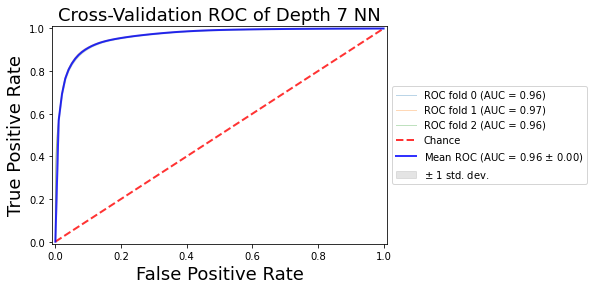

In [16]:
kfold = KFold(n_splits=3, shuffle=True)
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d7)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 99

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d7.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    t_test = targets[test].copy()
    x_test_d7 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    indices = np.random.choice(inputs[test].shape[0], 200, replace=False)#20000, replace=False)
    x_test_d7 = x_test_d7[indices]
    inputs_test_2 = inputs_test[indices]
    targets_test_2 = targets[test][indices]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    
    decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
    decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
    decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d7 = np.array(decoding_d7[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb_d7.transform(decoding_d7)

    if fold_no < 3:
        acc = partial_accuracy(targets_test_2, pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d7 = lookup_decoder(7)
    
    lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d7 = test_plut(lookup_d7, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 3:
        acc = partial_accuracy(targets[test], pred_plut_d7)
        f1 = f1_score(targets[test], pred_plut_d7, average='micro')
    else:
        pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
        f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
        acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1)
    
    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d7 = compile_FFNN_cv_model_DepthSeven(7)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_d7.fit(
        x=inputs_train ,
        y=targets[train],
        validation_split=.25,
        epochs= 150)
    
   # Generate generalization metrics
    scores = model_d7.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d7 = model_d7.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d7.copy() #change here
    pred[pred>=.5]=1 
    pred[pred<.5]=0
     
    if fold_no < 3:
        acc = scores[1]
        f1 = f1_score(targets[test], pred, average='micro', zero_division=0)
    else:
        pred = model_d7.predict(inputs_test_2)
        pred[pred>=.5]=1 
        pred[pred<.5]=0
        acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
        f1 = f1_score(targets_test_2, pred, average='micro', zero_division=0)
 
    acc_per_fold.append(acc)
    f1_per_fold.append(f1)

    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
        aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## End